In [ ]:
#mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
# Google Drive path where project material is available
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Dissertation'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['accepted_2007_to_2018q4.csv.zip', 'accepted_2013_to_2018_latest.csv', 'accepted_2013_to_2018_latest1.csv', 'sample_model.ipynb', 'Cleaned_data.csv', 'Final_balanced_data.csv', 'ANN_2.ipynb', 'Data_cleaning.ipynb', 'FINAL_unbalancedData.csv', 'FINAL_balancedData.csv', 'FINAL_forModeling.csv', 'y_data.csv', 'x_data.csv', 'XGBoost_model.ipynb', 'Model4_XGBoost_GPU.ipynb', 'NN_Keras.ipynb', 'Cleaned_data_dummy.csv', '3_Filter Individual_loans_EDA_ and_cleaning.ipynb', 'Copy of Individual_loans_hypothesisTesting.ipynb', 'Decsion_tree_model.joblib', 'Model_1_Logistic_regression.ipynb', 'Random_fores.joblib', 'XGBoost_model.joblib', 'ANN_model.joblib', 'Model_3_Random_Forest.ipynb', 'XAI_RandomForest.ipynb', '4_Individual_loans_hypothesisTesting_and_undersampling.ipynb', 'FINAL_balancedData_testing.csv', 'Model_5_ANN.ipynb', 'Random_forest_model.ipynb', 'Untitled0.ipynb', '1_Filter_data_2013_to_2018.ipynb', '2_Filter_data_on_Loan_status.ipynb', 'Copy of 3_Filter Individual_loans_EDA_ and_cl

In [ ]:
#Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df = pd.read_csv(os.path.join(GOOGLE_DRIVE_PATH, 'accepted_2013_to_2018_latest.csv')) #load data from year 2013 to 2018, with class label (Charged off, default and fully paid)

<ipython-input-5-ff906238df7b>:1: DtypeWarning: Columns (19,49,59,118,129,130,131,134,135,136,139) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(GOOGLE_DRIVE_PATH, 'accepted_2013_to_2018_latest.csv')) #load data from year 2013 to 2018, with class label (Charged off, default and fully paid)


In [ ]:
df.head() #display data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,4421.723917,4421.72,3600.0,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,25679.660000,25679.66,24700.0,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [ ]:
df['loan_status'].value_counts() # we have filtered only Fully paid , CHarged off and default

,count
loan_status,
Fully Paid,997912
Charged Off,254245
Default,40


In [ ]:
df['application_type'].value_counts() # we observed there are two types of application we are considering only individual account due to less data for joint and computational demands

,count
application_type,
Individual,1226391
Joint App,25806


In [ ]:
df_individual = df[df['application_type'] != 'Joint App'].copy() #delete observations where application type is joint

In [ ]:
#we will drop all the features which are associated with joint account
df_individual= df_individual.drop(['application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'revol_bal_joint', 'sec_app_fico_range_low',
                                   'sec_app_fico_range_high', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util',
                                   'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog',
                                  ], axis =1)

In [ ]:
df_individual.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,4421.723917,4421.72,3600.0,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,25679.660000,25679.66,24700.0,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,major_purchase,Major purchase,174xx,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,NaN,12.0,0.0,21929.0,64.5,35.0,w,0.0,0.0,11740.500000,11740.50,10400.0,1340.50,0.0,0.0,0.0,Jul-2016,10128.96,NaN,Mar-2018,704.0,700.

In [ ]:
#delete the features which are of no use : member_id, url, desc, title( purpose is same and have no value), zipcode
df_individual = df_individual.drop(['member_id','url', 'desc', 'title', 'zip_code' ], axis =1)

In [ ]:
df_individual.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,debt_consolidation,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,4421.723917,4421.72,3600.0,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,small_business,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,25679.660000,25679.66,24700.0,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,n,major_purchase,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,NaN,12.0,0.0,21929.0,64.5,35.0,w,0.0,0.0,11740.500000,11740.50,10400.0,1340.50,0.0,0.0,0.0,Jul-2016,10128.96,NaN,Mar-2018,704.0,700.0,0.0,NaN,1.0,0.0,0.0,331730.0,1.0,3.0,0.0,3.0,14.0,73839.0,84.0,4.0,7.0,9702.0,78.0,34000.0,2.0,1.0,3.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,12.0,1.0,12.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,957

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format) # to see statistical description in interger form

In [ ]:
df_individual.info(verbose =True)

<class 'pandas.core.frame.DataFrame'>
Index: 1226391 entries, 0 to 1252196
Data columns (total 129 columns):
 #    Column                                      Dtype  
---   ------                                      -----  
 0    id                                          int64  
 1    loan_amnt                                   float64
 2    funded_amnt                                 float64
 3    funded_amnt_inv                             float64
 4    term                                        object 
 5    int_rate                                    float64
 6    installment                                 float64
 7    grade                                       object 
 8    sub_grade                                   object 
 9    emp_title                                   object 
 10   emp_length                                  object 
 11   home_ownership                              object 
 12   annual_inc                                  float64
 13   verification_st

In [ ]:
df_individual.describe() # statistical summary of the numerical data
#dti have negative data

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,1226391.00,1226391.00,1226391.00,1226391.00,1226391.00,1226391.00,1226391.00,1226391.00,1226391.00,1226391.00,1226391.00,1226390.00,618190.00,219655.00,1226391.00,1226391.00,1226391.00,1225676.00,1226391.00,1226391.00,1226391.00,1226391.00,1226391.00,1226391.00,1226391.00,1226391.00,1226391.00,1226391.00,1226391.00,1226391.00,1226391.00,1226391.00,342232.00,1226391.00,1226391.00,1226391.00,1226391.00,512104.00,512105.00,512105.00,512105.00,498645.00,512105.00,443707.00,512105.00,512105.00,512105.00,512065.00,1226391.00,512105.00,512104.00,512104.00,1226391.00,1226372.00,1213660.00,1212934.00,1226391.00,1226391.00,1190280.00,1226391.00,1226391.00,1226391.00,1226391.00,1214490.00,306771.00,1107869.00,427966.00,1226391.00,1226391.00,1226391.00,1226391.00,1226391.00,1226391.00,1226391.00,1226390.00,1226391.00,1226391.00,1176516.00,1226391.00,1226391.00,1226391.00,1226237.00,1213248.00,1226391.00,1226391.00,1226391.00,1226391.00,1226391.00,1226391.00,5580.00,5580.00,5580.00,5580.00,3674.00,5580.00,5580.00,32150.00,32150.00,32150.00
mean,59365842.85,14468.97,14468.97,14463.35,13.23,439.77,77157.29,18.23,0.33,695.18,699.18,0.64,34.18,70.37,11.72,0.23,16405.00,51.70,25.16,0.27,0.27,14840.38,14834.64,12209.44,2381.13,1.59,248.21,42.00,5486.14,676.50,659.04,0.02,43.68,1.00,0.01,254.04,140579.58,1.05,2.80,0.78,1.75,19.55,35687.28,71.42,1.43,3.03,5535.32,58.14,32877.70,1.09,1.59,2.31,4.72,13394.08,10240.43,59.78,0.01,16.12,125.88,181.69,13.06,7.83,1.67,23.73,39.63,6.71,35.73,0.51,3.65,5.66,4.75,8.11,8.59,8.30,14.64,5.61,11.67,0.00,0.00,0.09,2.19,94.14,44.91,0.14,0.06,173864.33,49907.20,21715.49,42153.61,3.00,144.78,3.00,13.92,405.70,10824.13,183.42,4993.01,47.66,13.26
std,36061156.59,8698.15,8698.15,8695.27,4.78,261.06,70972.03,8.40,0.90,31.32,31.32,0.93,21.92,26.29,5.52,0.62,22817.76,24.33,12.05,67.18,67.18,10315.99,10312.50,8869.42,2562.96,10.91,966.91,169.70,7096.89,81.47,133.78,0.15,21.38,0.00,0.08,11262.90,157324.12,1.21,3.00,1.00,1.69,24.83,42901.41,22.96,1.58,2.72,5475.69,20.92,36931.46,1.58,2.80,2.54,3.20,16187.30,15390.96,28.25,0.11,843.71,52.29,94.59,16.28,8.69,2.00,30.68,22.73,5.85,22.46,1.33,2.25,3.31,2.97,4.80,7.41,4.57,8.14,3.22,5.51,0.03,0.06,0.51,1.85,8.76,35.99,0.39,0.41,178069.50,48053.19,21657.48,43279.38,0.00,126.51,0.00,9.79,354.60,7382.76,195.27,3647.45,7.18,8.15
min,55716.00,1000.00,1000.00,725.00,5.31,4.93,2000.00,-1.00,0.00,660.00,664.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,

In [ ]:
# df_individual(dtype = 'object').describe()

In [ ]:
df_individual[df_individual['dti']<0]

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
582690,74636850,15000.00,15000.00,15000.00,36 months,9.75,482.25,B,B3,Maintenance electrician,5 years,MORTGAGE,94000.00,Source Verified,Mar-2016,Fully Paid,n,debt_consolidation,OR,-1.00,0.00,Sep-2003,670.00,674.00,0.00,63.00,66.00,12.00,1.00,15445.00,45.80,24.00,w,0.00,0.00,16188.78,16188.78,15000.00,1188.78,0.00,0.00,0.00,Feb-2017,11382.53,NaN,Mar-2019,714.00,710.00,0.00,63.00,1.00,0.00,0.00,93070.00,1.00,3.00,1.00,4.00,10.00,77625.00,90.00,2.00,4.00,4108.00,73.00,33700.00,1.00,10.00,2.00,8.00,8461.00,3942.00,61.70,0.00,0.00,98.00,150.00,2.00,2.00,1.00,15.00,63.00,10.00,63.00,0.00,3.00,5.00,3.00,6.00,10.00,9.00,13.00,5.00,11.00,0.00,0.00,0.00,3.00,95.80,33.30,1.00,0.00,127743.00,93070.00,10300.00,94043.00,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#negative value row has been ommited from the data
df_individual = df_individual[df_individual['dti']>0]

In [ ]:
#dti have negative values
#total_rec_late_fee have -0.0 which doesn't mean anything ( are noise in data)



In [ ]:
df_individual.isna().sum() #check null values in data

,0
id,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,76236


In [ ]:
def delete_missing_features_more_than_90(df, threshold=90):
    missing_feature_percentages = df.isna().mean() * 100  #percentage missing in particular feature

    features_to_drop = missing_feature_percentages[missing_feature_percentages >= threshold].index #features with missing value more than 90% are deleted


    print(f"Features with {threshold} percent or more missing values:") # print feature name and their percentage of null
    for col in features_to_drop:
        print(f"{col}: {missing_feature_percentages[col]:.2f}% missing")


    df_cleaned = df.drop(columns=features_to_drop)  #delete the features which have more than 90% null

     # Summary of change in data shape
    print(f"\nOriginal loan dataframe shape: {df.shape}")
    print(f"\nNew loan dataframe shape: {df_cleaned.shape}")
    print(f"number of features dropped: {len(features_to_drop)}")

    return df_cleaned

In [ ]:
df_cleaned = delete_missing_features_more_than_90(df_individual, threshold=90) # deleted features which have more than and equal to 90% of the data is null


Features with 90 percent or more missing values:
next_pymnt_d: 100.00% missing
hardship_type: 99.54% missing
hardship_reason: 99.54% missing
hardship_status: 99.54% missing
deferral_term: 99.54% missing
hardship_amount: 99.54% missing
hardship_start_date: 99.54% missing
hardship_end_date: 99.54% missing
payment_plan_start_date: 99.54% missing
hardship_length: 99.54% missing
hardship_dpd: 99.54% missing
hardship_loan_status: 99.54% missing
orig_projected_additional_accrued_interest: 99.70% missing
hardship_payoff_balance_amount: 99.54% missing
hardship_last_payment_amount: 99.54% missing
debt_settlement_flag_date: 97.38% missing
settlement_status: 97.38% missing
settlement_date: 97.38% missing
settlement_amount: 97.38% missing
settlement_percentage: 97.38% missing
settlement_term: 97.38% missing

Original loan dataframe shape: (1225804, 129)

New loan dataframe shape: (1225804, 108)
number of features dropped: 21


In [ ]:
#21 features are omitted from the the data

In [ ]:
df_cleaned.info(verbose =True)

<class 'pandas.core.frame.DataFrame'>
Index: 1225804 entries, 0 to 1252196
Data columns (total 108 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    loan_amnt                       float64
 2    funded_amnt                     float64
 3    funded_amnt_inv                 float64
 4    term                            object 
 5    int_rate                        float64
 6    installment                     float64
 7    grade                           object 
 8    sub_grade                       object 
 9    emp_title                       object 
 10   emp_length                      object 
 11   home_ownership                  object 
 12   annual_inc                      float64
 13   verification_status             object 
 14   issue_d                         object 
 15   loan_status                     object 
 16   pymnt_plan                      object 
 17   purpose    

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'funded_amnt'}>,
        <Axes: title={'center': 'funded_amnt_inv'}>,
        <Axes: title={'center': 'int_rate'}>,
        <Axes: title={'center': 'installment'}>,
        <Axes: title={'center': 'annual_inc'}>,
        <Axes: title={'center': 'dti'}>,
        <Axes: title={'center': 'delinq_2yrs'}>],
       [<Axes: title={'center': 'fico_range_low'}>,
        <Axes: title={'center': 'fico_range_high'}>,
        <Axes: title={'center': 'inq_last_6mths'}>,
        <Axes: title={'center': 'mths_since_last_delinq'}>,
        <Axes: title={'center': 'mths_since_last_record'}>,
        <Axes: title={'center': 'open_acc'}>,
        <Axes: title={'center': 'pub_rec'}>,
        <Axes: title={'center': 'revol_bal'}>,
        <Axes: title={'center': 'revol_util'}>],
       [<Axes: title={'center': 'total_acc'}>,
        <Axes: title={'center': 'out_prncp'}>,
        <Axes: titl

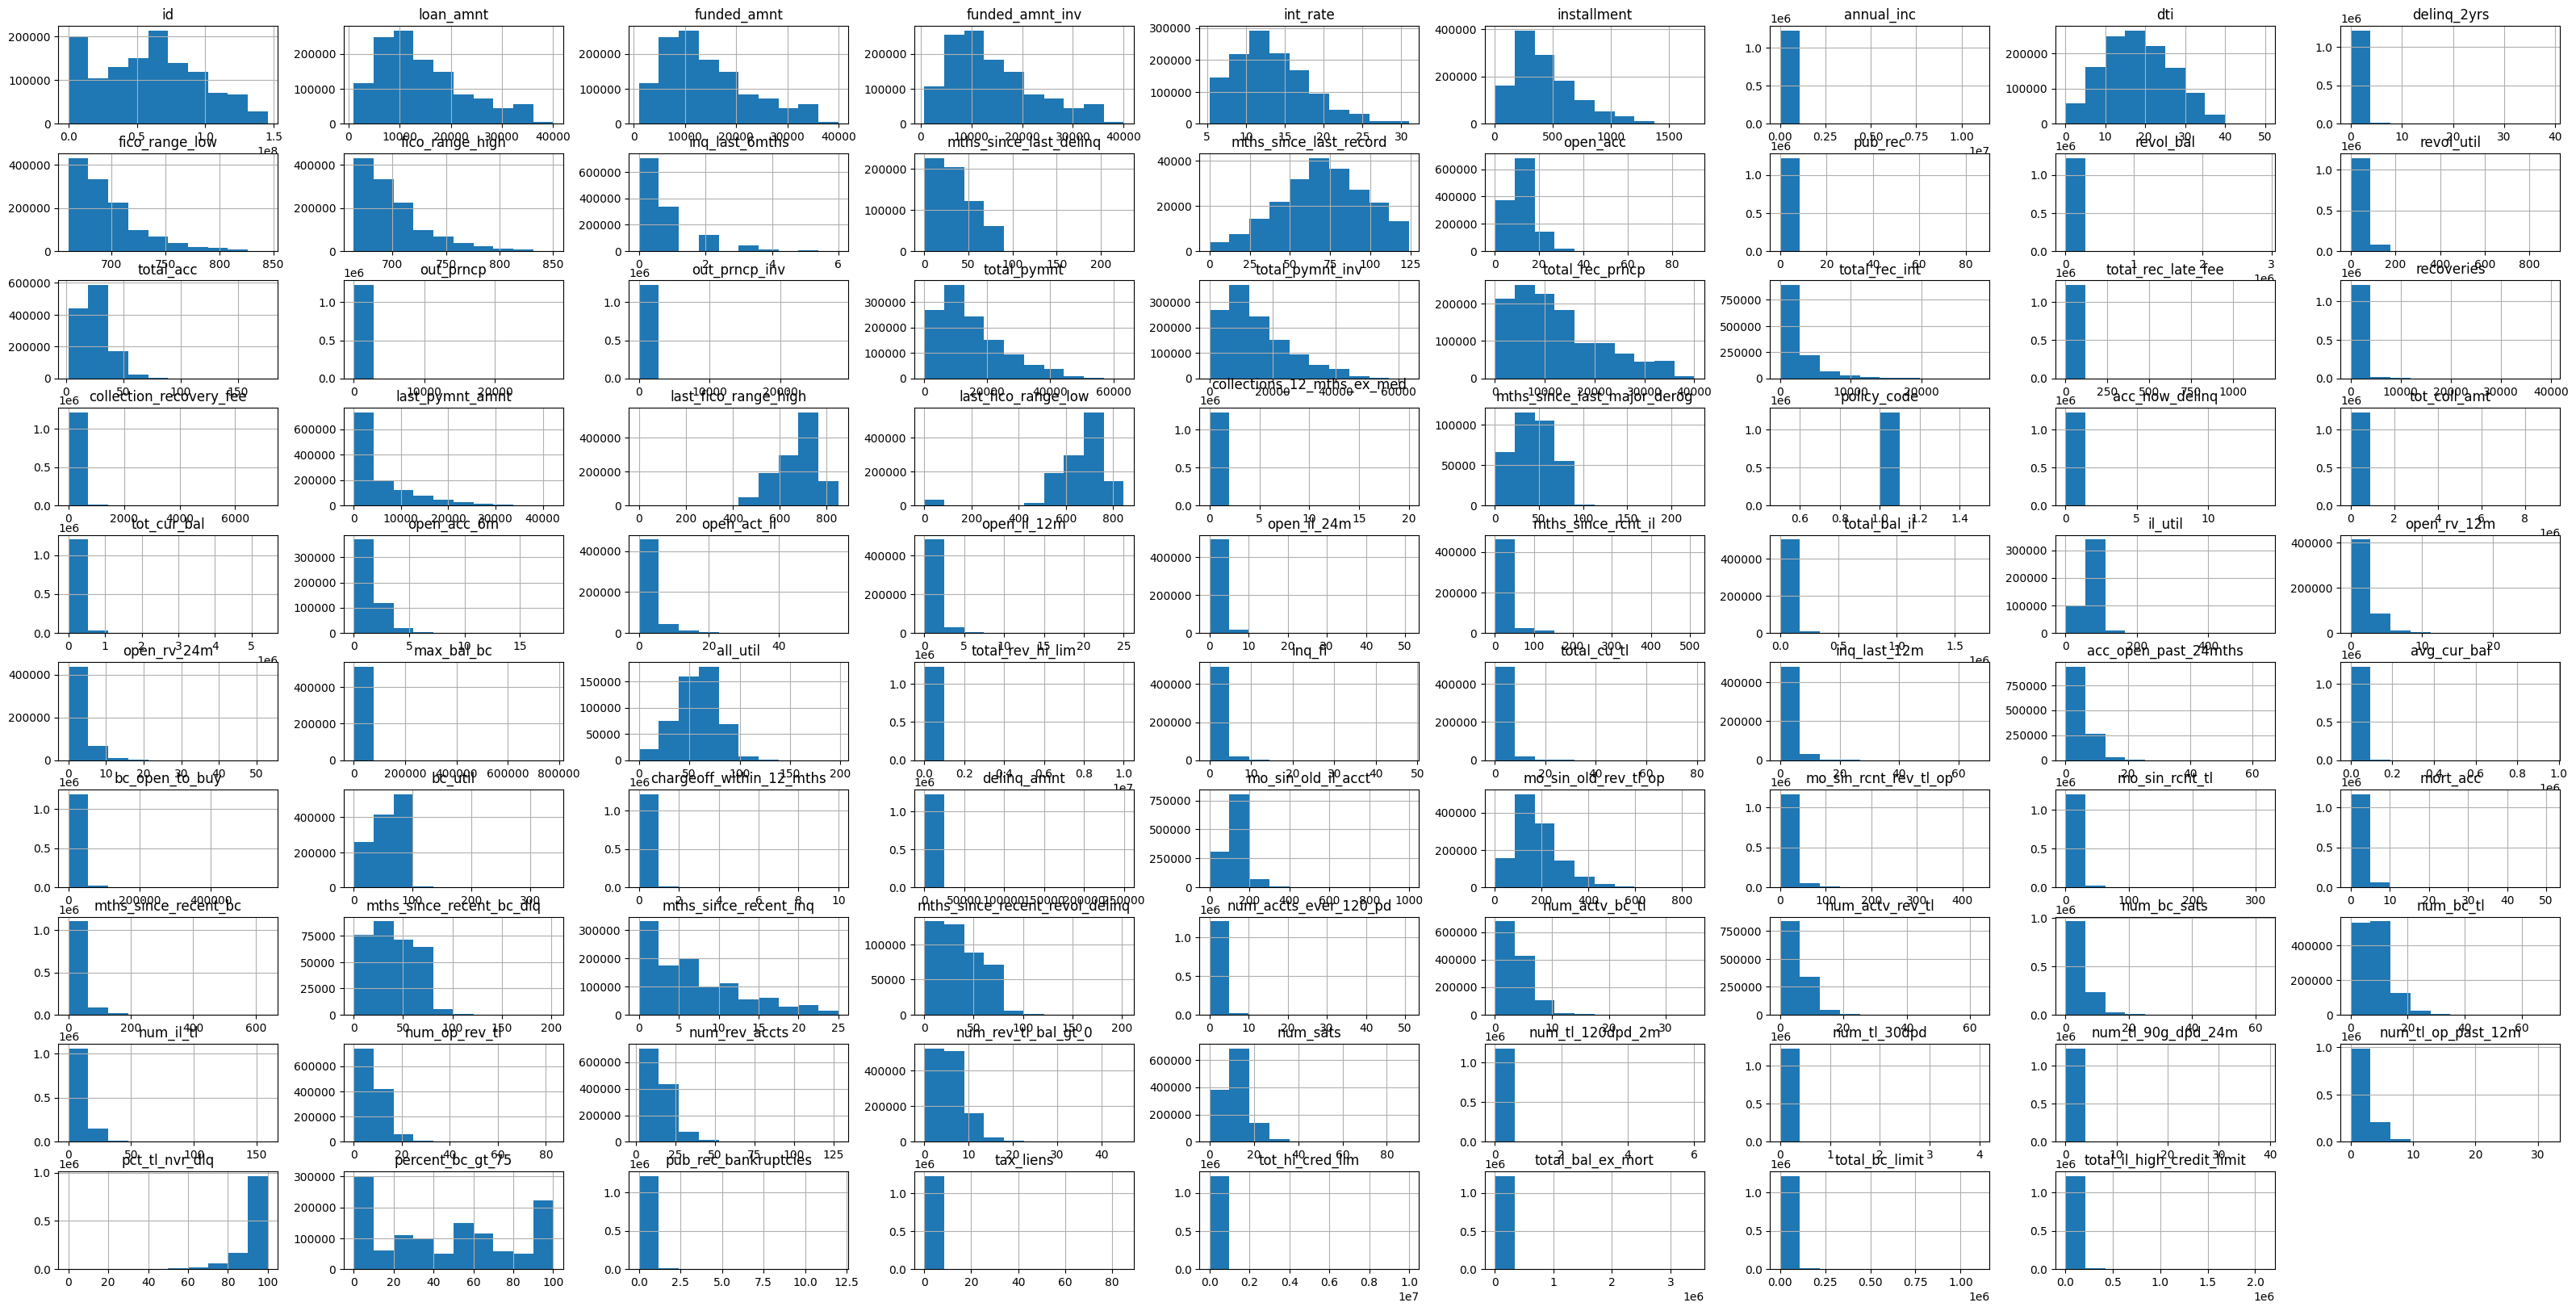

In [ ]:
df_cleaned.hist(figsize=(40,20))#overall distribution of  numerical features


In [ ]:
#We observed that annual income, delinq_2yrs,pub_rec,revol_bal, revol_util, out_prncp, total_rec_late_fee,revoveries,collection_recovery,collections_12_mths_ex_med,
# open_il_24m,mths_since_last_major_derog,total_rec_late_fee,acc_now_delinq, total_coll_amt,
#total_cur_bal, open_act_il, open_il_12m, open_il_24m, mths_since_rcnt_il,total_bal_il,max_bal_bc,total_rev_hi_lim,inq_fi, avg_cur_bal,
#obc_open_to_buy, chargeoff_within_12_mths,delinq_amnt, mo_since_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,
#num_accts_ever_120_pd,num_tl_12-dpd_2m, num_tl_30_dpd,num_tl_90g_dpd_24m,pub_rec_bankruptcies, tax_leins, tital_hi_cred_lim, total_bc_limit, total_il_high_credit_limit
#have outliers

In [ ]:
#function to analyze outliers observed above
def analyze_outliers(df, col):

    df[col] = pd.to_numeric(df[col], errors='coerce') # to convert feature to numeric if not already

    print(df[col].describe()) # descriptive statistics of feature

    fig, axes = plt.subplots(2, 2, figsize=(15, 15))     # define subplot to plot distributions

    sns.histplot(x=df[col], bins=50, kde=True, ax=axes[0, 0], hue = 'loan_status', data =df) # Initial data histogram
    axes[0, 0].set_title(f'Original distribution of {col}')
    axes[0, 0].set_xlabel(f'{col}')


    sns.histplot(np.log1p(df[col]), bins=50, kde=True, ax=axes[0, 1]) # feature histogram after log transformation
    axes[0, 1].set_title(f'Log-transformation of {col}')
    axes[0, 1].set_xlabel(f'Log({col} + 1)') # incase we get log 0 , to avoid that added 1


    Q1 = df[col].quantile(0.25) # Histogram after removing outliers which is performed using IQR
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lowerBound = Q1 - 1.5 * IQR
    upperBound = Q3 + 1.5 * IQR
    df_filtered = df[(df[col] >= lowerBound) & (df[col] <= upperBound)]

    sns.histplot(x =df_filtered[col], bins=50, kde=True, ax=axes[1, 0], data = df_filtered ) #histogram after removing outliers
    axes[1, 0].set_title(f'Distribution of {col} with Outliers Removed')
    axes[1, 0].set_xlabel(f'{col}')

    sns.boxplot(y=df[col], ax=axes[1, 1]) #box plot of original data
    axes[1, 1].set_title(f'Box Plot of {col}')
    axes[1, 1].set_ylabel(f'{col}')
    plt.show()




count    1225804.00
mean       77163.43
std        70981.63
min         2000.00
25%        46987.00
50%        65000.00
75%        92000.00
max     10999200.00
Name: annual_inc, dtype: float64


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

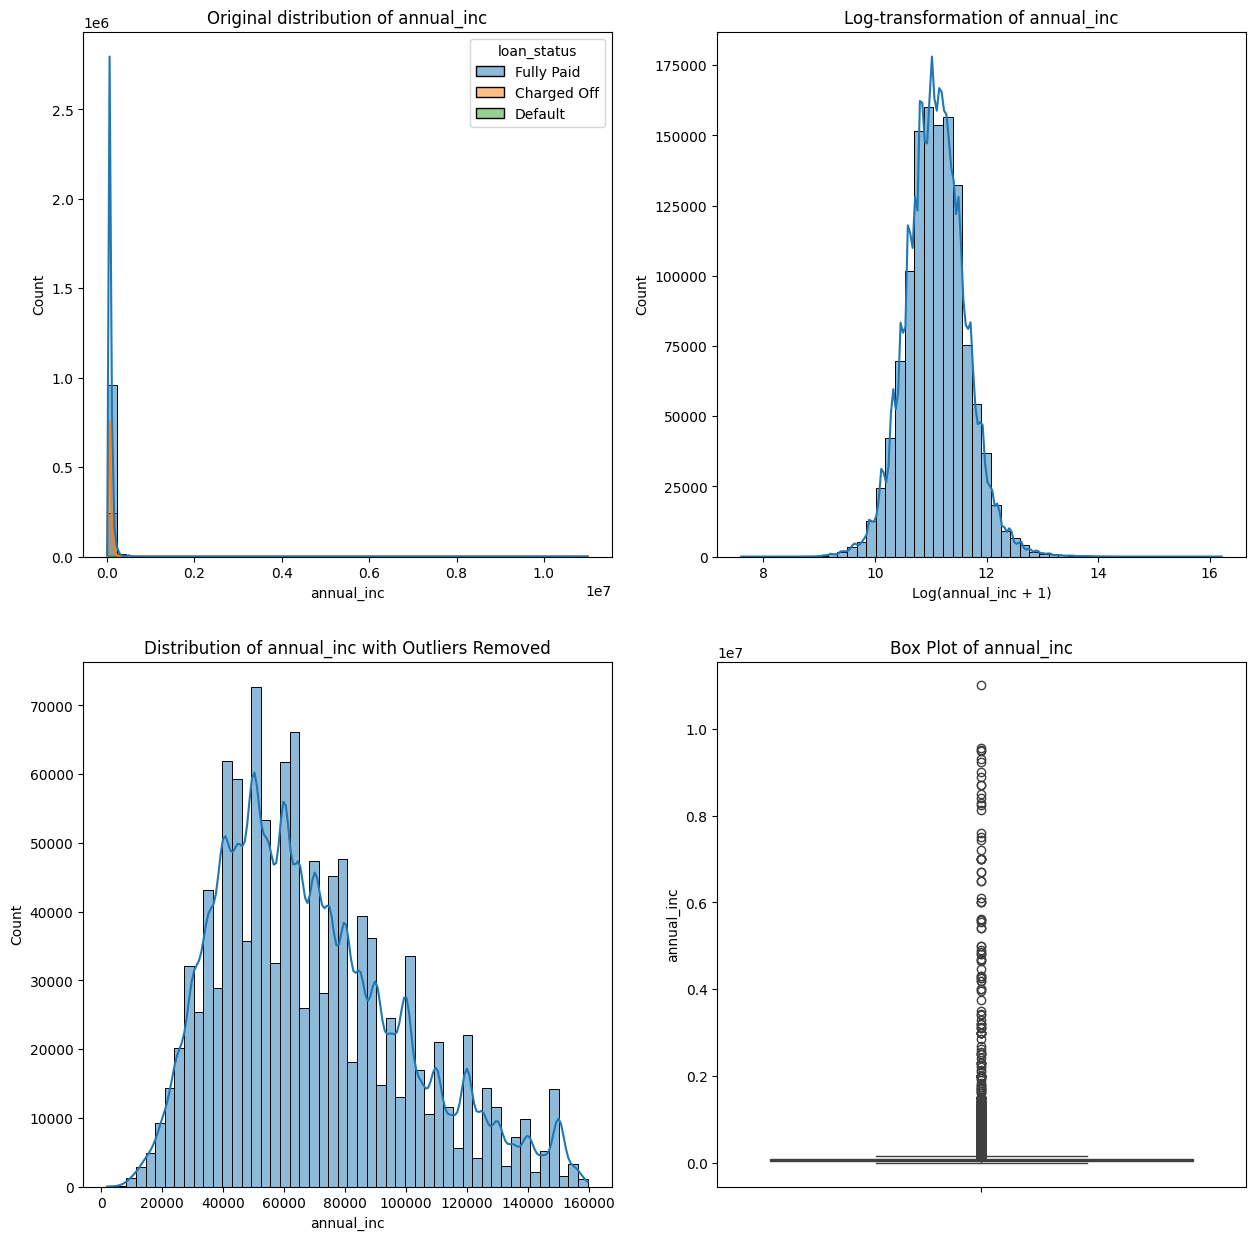

In [ ]:
analyze_outliers(df_cleaned, 'annual_inc')

count   1225804.00
mean          0.33
std           0.90
min           0.00
25%           0.00
50%           0.00
75%           0.00
max          39.00
Name: delinq_2yrs, dtype: float64


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

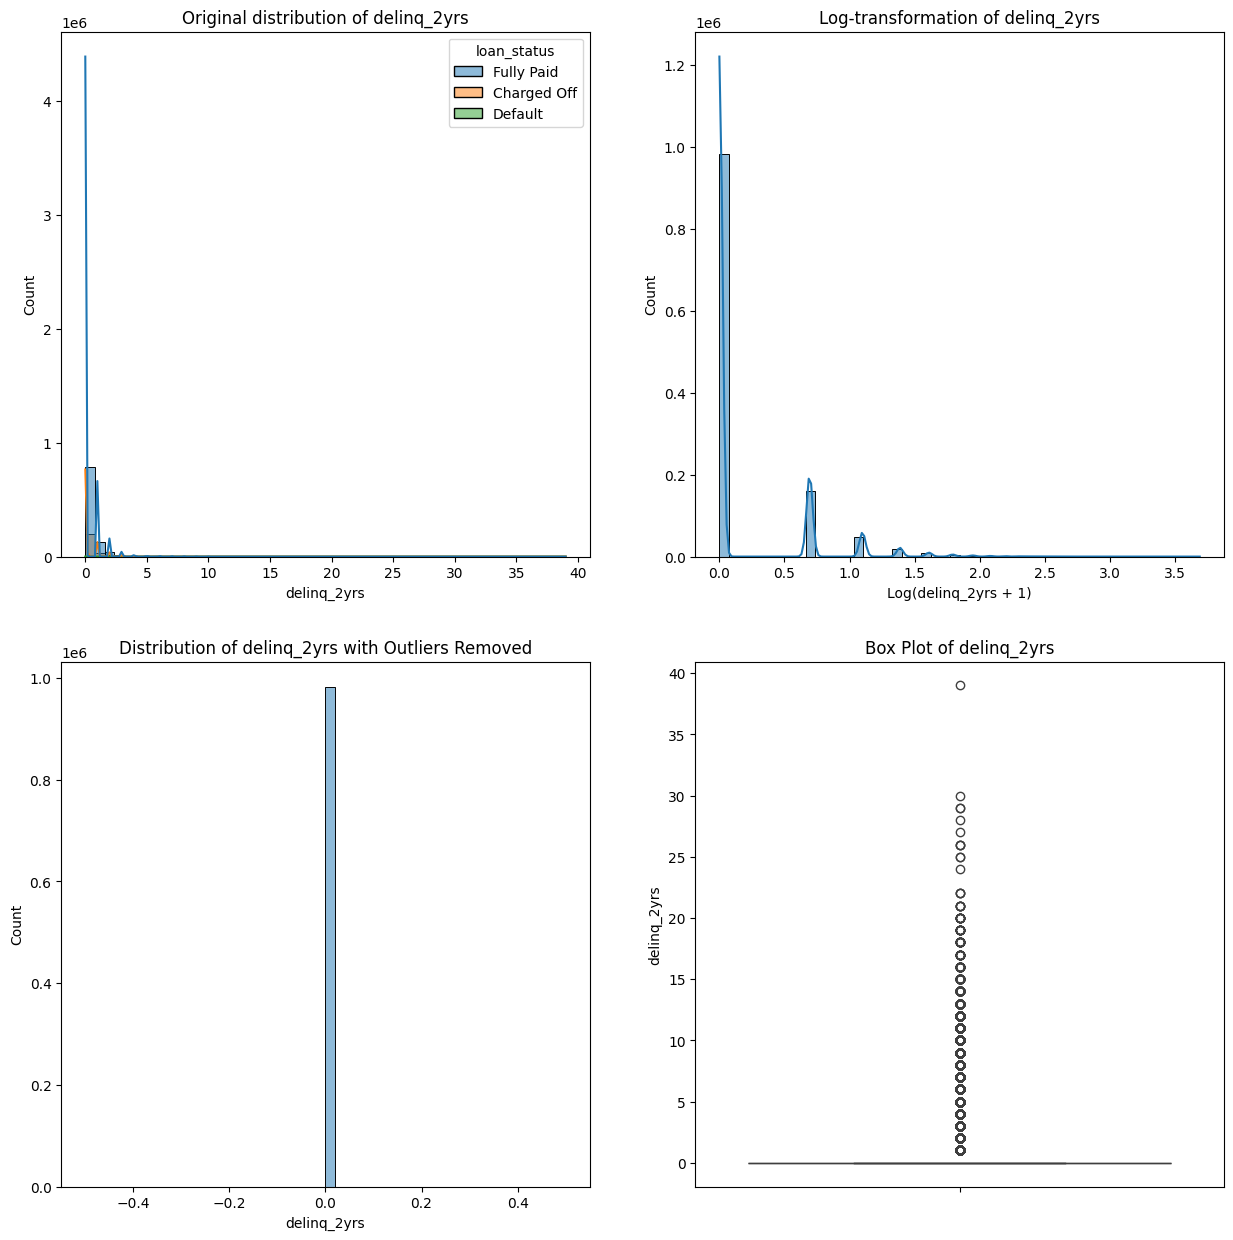

In [ ]:
analyze_outliers(df_cleaned, 'delinq_2yrs') #it shows outliers are actually important as many of the loans are not delinquent in 2 years

In [ ]:

# df_default = df_cleaned[df_cleaned['loan_status']==1]
# df_nonDefault =df_cleaned[df_cleaned['loan_status']==0]

In [ ]:
df_cleaned['loan_status'].value_counts()

,count
loan_status,
Fully Paid,977984
Charged Off,247786
Default,34


In [ ]:
df_cleaned[df_cleaned['out_prncp']==0]['loan_status'].value_counts()
#charged off and fully paid have outstanding principle value 0 , default have values in outstanding principle

,count
loan_status,
Fully Paid,977984
Charged Off,247786


In [ ]:
#outstanding principle is 0 - for default as well as fully paid loan


In [ ]:
df_cleaned[df_cleaned['out_prncp']>0]['loan_status'].value_counts()
#only default cases have outstanding principle more than zero which is understandable

,count
loan_status,
Default,34


In [ ]:
df_cleaned[df_cleaned['out_prncp']==0].head() #Analyzinf features with outstanding principle zero

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,68407277,3600.00,3600.00,3600.00,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.00,Not Verified,Dec-2015,Fully Paid,n,debt_consolidation,PA,5.91,0.00,Aug-2003,675.00,679.00,1.00,30.00,NaN,7.00,0.00,2765.00,29.70,13.00,w,0.00,0.00,4421.72,4421.72,3600.00,821.72,0.00,0.00,0.00,Jan-2019,122.67,Mar-2019,564.00,560.00,0.00,30.00,1.00,0.00,722.00,144904.00,2.00,2.00,0.00,1.00,21.00,4981.00,36.00,3.00,3.00,722.00,34.00,9300.00,3.00,1.00,4.00,4.00,20701.00,1506.00,37.20,0.00,0.00,148.00,128.00,3.00,3.00,1.00,4.00,69.00,4.00,69.00,2.00,2.00,4.00,2.00,5.00,3.00,4.00,9.00,4.00,7.00,0.00,0.00,0.00,3.00,76.90,0.00,0.00,0.00,178050.00,7746.00,2400.00,13734.00,N,Cash,N
1,68355089,24700.00,24700.00,24700.00,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.00,Not Verified,Dec-2015,Fully Paid,n,small_business,SD,16.06,1.00,Dec-1999,715.00,719.00,4.00,6.00,NaN,22.00,0.00,21470.00,19.20,38.00,w,0.00,0.00,25679.66,25679.66,24700.00,979.66,0.00,0.00,0.00,Jun-2016,926.35,Mar-2019,699.00,695.00,0.00,NaN,1.00,0.00,0.00,204396.00,1.00,1.00,0.00,1.00,19.00,18005.00,73.00,2.00,3.00,6472.00,29.00,111800.00,0.00,0.00,6.00,4.00,9733.00,57830.00,27.10,0.00,0.00,113.00,192.00,2.00,2.00,4.00,2.00,NaN,0.00,6.00,0.00,5.00,5.00,13.00,17.00,6.00,20.00,27.00,5.00,22.00,0.00,0.00,0.00,2.00,97.40,7.70,0.00,0.00,314017.00,39475.00,79300.00,24667.00,N,Cash,N
3,68476807,10400.00,10400.00,10400.00,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.00,Source Verified,Dec-2015,Fully Paid,n,major_purchase,PA,25.37,1.00,Jun-1998,695.00,699.00,3.00,12.00,NaN,12.00,0.00,21929.00,64.50,35.00,w,0.00,0.00,11740.50,11740.50,10400.00,1340.50,0.00,0.00,0.00,Jul-2016,10128.96,Mar-2018,704.00,700.00,0.00,NaN,1.00,0.00,0.00,331730.00,1.00,3.00,0.00,3.00,14.00,73839.00,84.00,4.00,7.00,9702.00,78.00,34000.00,2.00,1.00,3.00,10.00,27644.00,4567.00,77.50,0.00,0.00,128.00,210.00,4.00,4.00,6.00,4.00,12.00,1.00,12.00,0.00,4.00,6.00,5.00,9.00,10.00,7.00,19.00,6.00,12.00,0.00,0.00,0.00,4.00,96.60,60.00,0.00,0.00,439570.00,95768.00,20300.00,88097.00,N,Cash,N
4,68426831,11950.00,11950.00,11950.00,36 months,13.44,405.18,C,C3,Veterinary Tecnician,4 years,RENT,34000.00,Source Verified,Dec-2015,Fully Paid,n,debt_consolidation,GA,10.20,0.00,Oct-1987,690.00,694.00,0.00,NaN,NaN,5.00,0.00,8822.00,68.40,6.00,w,0.00,0.00,13708.95,13708.95,11950.00,1758.95,0.00,0.00,0.00,May-2017,7653.56,May-2017,759.

In [ ]:
df_cleaned_no_default = df_cleaned[df_cleaned['out_prncp']==0]
# FOR OUR Research we are considering  charged off (as a default)which could go default and fully paid class.

In [ ]:
df_cleaned_no_default['loan_status'].value_counts()
#We are taking only charged off and Fully paid

,count
loan_status,
Fully Paid,977984
Charged Off,247786


In [ ]:
#Analyzing loan characteristics - loan amount, principle, dti, interest related features
df_loan_amt= df_cleaned_no_default[['loan_amnt','term','int_rate','out_prncp','out_prncp_inv','total_pymnt','total_rec_prncp','total_rec_int','total_pymnt_inv','dti', 'loan_status']].tail(100)

In [ ]:
df_loan_amt.tail(20)
#Total_payment(total payment recieved) = total_rec_prncp( total recieved principle) + total_rec_int( total_recieved interest)
#out_prncp and out_prncp_inv ( are outstanding principle which is 0 in complete column, we will be removing it as this feature shows when the loan is already defaulted for defaulted class and the remining amount it shows for other classes)
# We need to describe Fully paid and charged off the report

,loan_amnt,term,int_rate,out_prncp,out_prncp_inv,total_pymnt,total_rec_prncp,total_rec_int,total_pymnt_inv,dti,loan_status
1252176,10000.00,60 months,15.59,0.00,0.00,12612.35,10000.00,2612.35,12612.35,29.18,Fully Paid
1252177,2000.00,36 months,8.99,0.00,0.00,936.89,703.99,217.90,936.89,15.01,Charged Off
1252178,19200.00,60 months,12.79,0.00,0.00,7792.29,4540.42,3251.87,7792.29,9.65,Charged Off
1252179,11200.00,60 months,13.99,0.00,0.00,11949.57,11200.00,749.57,11949.57,22.62,Fully Paid
1252181,22400.00,60 months,13.49,0.00,0.00,5111.13,2772.34,2338.79,5111.13,23.22,Charged Off
1252182,19400.00,60 months,14.49,0.00,0.00,24960.43,19400.00,5560.43,24960.43,13.02,Fully Paid
1252183,38000.00,60 months,13.49,0.00,0.00,21191.57,12914.79,8276.78,21191.57,14.44,Charged Off
1252184,32000.00,60 months,13.99,0.00,0.00,8403.35,747.04,679.62,8403.35,29.89,Charged Off
1252185,20000.00,60 months,15.59,0.00,0.00,23465.20,20000.00,3465.20,23465.20,12.36,Fully Paid
1252186,16000.00,60 months,10.99,0.00,0.00,18183.15,16000.00,2183.15,18183.15,12.40,Fully Paid


In [ ]:
df_cleaned_no_default = df_cleaned_no_default.drop(['out_prncp','out_prncp_inv'], axis=1)

In [ ]:
#Total payment feature is derived from other feature so we are not considering that as well.
df_cleaned_no_default = df_cleaned_no_default.drop('total_pymnt', axis=1)

In [ ]:
#Also we obsereved that features like total principle recieved

In [ ]:
df_cleaned_no_default[df_cleaned_no_default['loan_amnt']!=df_cleaned_no_default['total_rec_prncp']]['loan_status'].value_counts()
#Out of ~9 lac records only 935 fully paid have loan amount not equal to total recieved principle

,count
loan_status,
Charged Off,247767
Fully Paid,935


In [ ]:
df_cleaned_no_default[(df_cleaned_no_default['loan_amnt']!=df_cleaned_no_default['total_rec_prncp']) & (df_cleaned_no_default['loan_status']=='Fully Paid')].head()
# there are 935 observations where loan amount and total_rec principle are not equal still its fully paid

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
564,68396564,20000.00,20000.00,20000.00,36 months,18.49,727.98,D,D5,Director Validation Services,8 years,RENT,137000.00,Source Verified,Dec-2015,Fully Paid,n,debt_consolidation,NY,18.48,0.00,Sep-2001,665.00,669.00,2.00,NaN,NaN,16.00,0.00,27103.00,74.90,32.00,w,20267.01,19999.99,267.02,0.00,0.00,0.00,Mar-2016,20.47,Jan-2019,739.00,735.00,0.00,NaN,1.00,0.00,57.00,58552.00,3.00,5.00,2.00,5.00,4.00,31449.00,65.00,5.00,9.00,6668.00,69.00,36200.00,2.00,0.00,8.00,14.00,3660.00,2097.00,89.80,0.00,0.00,159.00,162.00,2.00,2.00,1.00,4.00,NaN,1.00,NaN,0.00,6.00,9.00,6.00,10.00,9.00,11.00,22.00,9.00,16.00,0.00,0.00,0.00,7.00,100.00,100.00,0.00,0.00,84397.00,58552.00,20500.00,48197.00,N,Cash,N
23287,66493841,5375.00,5375.00,5375.00,36 months,12.59,180.05,C,C2,Logistics Associate,3 years,MORTGAGE,49920.00,Source Verified,Dec-2015,Fully Paid,n,debt_consolidation,CA,8.85,4.00,Jul-1989,675.00,679.00,0.00,3.00,NaN,6.00,0.00,1397.00,20.20,26.00,w,5440.81,5374.99,65.82,0.00,0.00,0.00,Feb-2016,73.33,May-2017,619.00,615.00,0.00,NaN,1.00,0.00,0.00,8825.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6900.00,NaN,NaN,NaN,5.00,1471.00,5503.00,20.20,0.00,0.00,141.00,317.00,21.00,8.00,1.00,21.00,3.00,20.00,3.00,0.00,3.00,3.00,5.00,16.00,5.00,5.00,20.00,3.00,6.00,0.00,0.00,0.00,1.00,79.20,20.00,0.00,0.00,16451.00,8825.00,6900.00,9551.00,N,Cash,N
46452,65732745,15000.00,15000.00,15000.00,36 months,9.99,483.94,B,B3,NaN,NaN,MORTGAGE,72000.00,Verified,Nov-2015,Fully Paid,n,debt_consolidation,MA,19.62,2.00,Aug-2002,660.00,664.00,1.00,15.00,NaN,11.00,0.00,6138.00,40.60,24.00,w,15288.18,14999.99,288.19,0.00,0.00,0.00,Feb-2016,14766.79,Jun-2016,694.00,690.00,0.00,72.00,1.00,0.00,0.00,291615.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15100.00,NaN,NaN,NaN,6.00,26510.00,2623.00,65.50,0.00,0.00,90.00,159.00,2.00,2.00,3.00,16.00,72.00,2.00,19.00,1.00,4.00,7.00,4.00,10.00,5.00,9.00,16.00,7.00,11.00,0.00,0.00,0.00,1.00,75.00,25.00,0.00,0.00,357172.00,18338.00,7600.00,22003.00,N,Cash,N
57297,64691933,18000.00,18000.00,18000.00,60 months,13.18,411.22,C,C3,UNIX and AS400 Server Support,10+ years,RENT,54000.00,Source Verified,Nov-2015,Fully Paid,n,credit_card,NY,4.73,0.00,Sep-1972,715.00,719.00,0.00,NaN,NaN,5.00,0.00,10792.00,43.70,16.00,w,18613.70,17999.99,613.71,0.00,0.00,0.00,Mar-2016,399.81,Mar-2019,789.00,785.00,0.00,NaN,1.00,0.00,0.00,10792.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24700.00,NaN,NaN,NaN,1.00,2158.00,12515.00,36.50,0.00,0.0

In [ ]:
# We observed that total recieved principle is equal to loan amount shows direct indication that loan is fully paid so we are not considering that
# also there are scenario where loan_ amt > total recieved principle (by 0.01) and vice versa which could be a tecnical glitch as shown in below table

df_cleaned_no_default[(df_cleaned_no_default['loan_amnt']>df_cleaned_no_default['total_rec_prncp']) & (df_cleaned_no_default['loan_status']=='Fully Paid')].head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
564,68396564,20000.00,20000.00,20000.00,36 months,18.49,727.98,D,D5,Director Validation Services,8 years,RENT,137000.00,Source Verified,Dec-2015,Fully Paid,n,debt_consolidation,NY,18.48,0.00,Sep-2001,665.00,669.00,2.00,NaN,NaN,16.00,0.00,27103.00,74.90,32.00,w,20267.01,19999.99,267.02,0.00,0.00,0.00,Mar-2016,20.47,Jan-2019,739.00,735.00,0.00,NaN,1.00,0.00,57.00,58552.00,3.00,5.00,2.00,5.00,4.00,31449.00,65.00,5.00,9.00,6668.00,69.00,36200.00,2.00,0.00,8.00,14.00,3660.00,2097.00,89.80,0.00,0.00,159.00,162.00,2.00,2.00,1.00,4.00,NaN,1.00,NaN,0.00,6.00,9.00,6.00,10.00,9.00,11.00,22.00,9.00,16.00,0.00,0.00,0.00,7.00,100.00,100.00,0.00,0.00,84397.00,58552.00,20500.00,48197.00,N,Cash,N
23287,66493841,5375.00,5375.00,5375.00,36 months,12.59,180.05,C,C2,Logistics Associate,3 years,MORTGAGE,49920.00,Source Verified,Dec-2015,Fully Paid,n,debt_consolidation,CA,8.85,4.00,Jul-1989,675.00,679.00,0.00,3.00,NaN,6.00,0.00,1397.00,20.20,26.00,w,5440.81,5374.99,65.82,0.00,0.00,0.00,Feb-2016,73.33,May-2017,619.00,615.00,0.00,NaN,1.00,0.00,0.00,8825.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6900.00,NaN,NaN,NaN,5.00,1471.00,5503.00,20.20,0.00,0.00,141.00,317.00,21.00,8.00,1.00,21.00,3.00,20.00,3.00,0.00,3.00,3.00,5.00,16.00,5.00,5.00,20.00,3.00,6.00,0.00,0.00,0.00,1.00,79.20,20.00,0.00,0.00,16451.00,8825.00,6900.00,9551.00,N,Cash,N
46452,65732745,15000.00,15000.00,15000.00,36 months,9.99,483.94,B,B3,NaN,NaN,MORTGAGE,72000.00,Verified,Nov-2015,Fully Paid,n,debt_consolidation,MA,19.62,2.00,Aug-2002,660.00,664.00,1.00,15.00,NaN,11.00,0.00,6138.00,40.60,24.00,w,15288.18,14999.99,288.19,0.00,0.00,0.00,Feb-2016,14766.79,Jun-2016,694.00,690.00,0.00,72.00,1.00,0.00,0.00,291615.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15100.00,NaN,NaN,NaN,6.00,26510.00,2623.00,65.50,0.00,0.00,90.00,159.00,2.00,2.00,3.00,16.00,72.00,2.00,19.00,1.00,4.00,7.00,4.00,10.00,5.00,9.00,16.00,7.00,11.00,0.00,0.00,0.00,1.00,75.00,25.00,0.00,0.00,357172.00,18338.00,7600.00,22003.00,N,Cash,N
57297,64691933,18000.00,18000.00,18000.00,60 months,13.18,411.22,C,C3,UNIX and AS400 Server Support,10+ years,RENT,54000.00,Source Verified,Nov-2015,Fully Paid,n,credit_card,NY,4.73,0.00,Sep-1972,715.00,719.00,0.00,NaN,NaN,5.00,0.00,10792.00,43.70,16.00,w,18613.70,17999.99,613.71,0.00,0.00,0.00,Mar-2016,399.81,Mar-2019,789.00,785.00,0.00,NaN,1.00,0.00,0.00,10792.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24700.00,NaN,NaN,NaN,1.00,2158.00,12515.00,36.50,0.00,0.0

In [ ]:
df_cleaned_no_default = df_cleaned_no_default.drop('total_rec_prncp', axis =1)

<Axes: xlabel='loan_amnt', ylabel='total_pymnt'>

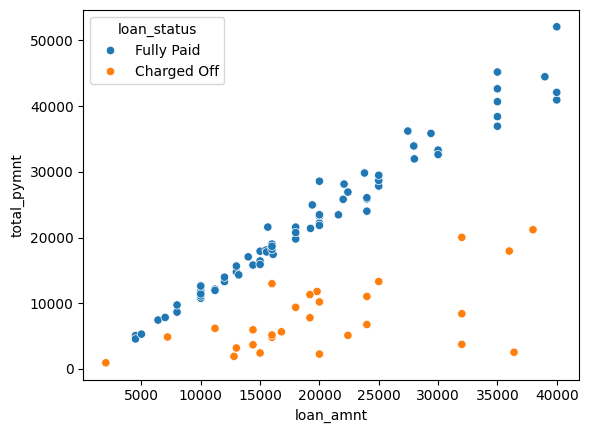

In [ ]:
sns.scatterplot(x ='loan_amnt', y= 'total_pymnt',hue = 'loan_status', data = df_loan_amt )

<Axes: xlabel='loan_amnt', ylabel='out_prncp'>

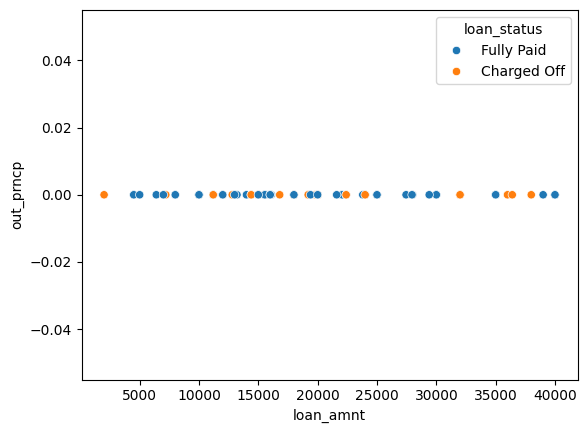

In [ ]:
sns.scatterplot(x ='loan_amnt', y= 'out_prncp',hue = 'loan_status', data = df_loan_amt )

<Axes: xlabel='loan_amnt', ylabel='total_rec_prncp'>

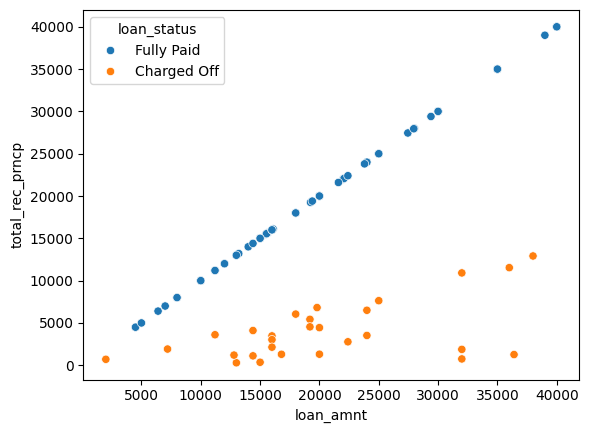

In [ ]:
sns.scatterplot(x ='loan_amnt', y= 'total_rec_prncp',hue = 'loan_status', data = df_loan_amt )
#this is deleted as explained above

<Axes: xlabel='loan_amnt', ylabel='total_rec_int'>

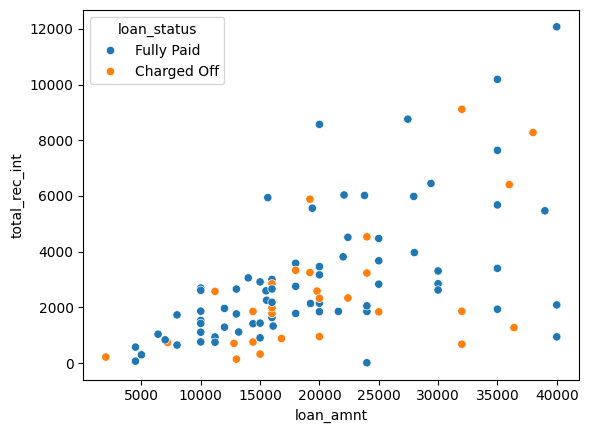

In [ ]:
sns.scatterplot(x ='loan_amnt', y= 'total_rec_int',hue = 'loan_status', data = df_loan_amt )

<Axes: xlabel='total_pymnt', ylabel='total_rec_int'>

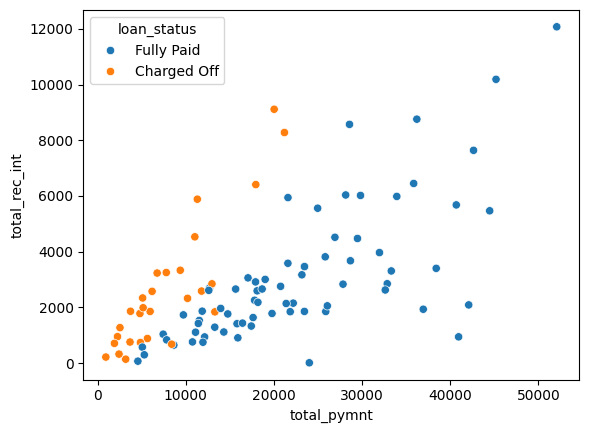

In [ ]:
sns.scatterplot(x ='total_pymnt', y= 'total_rec_int',hue = 'loan_status', data = df_loan_amt )

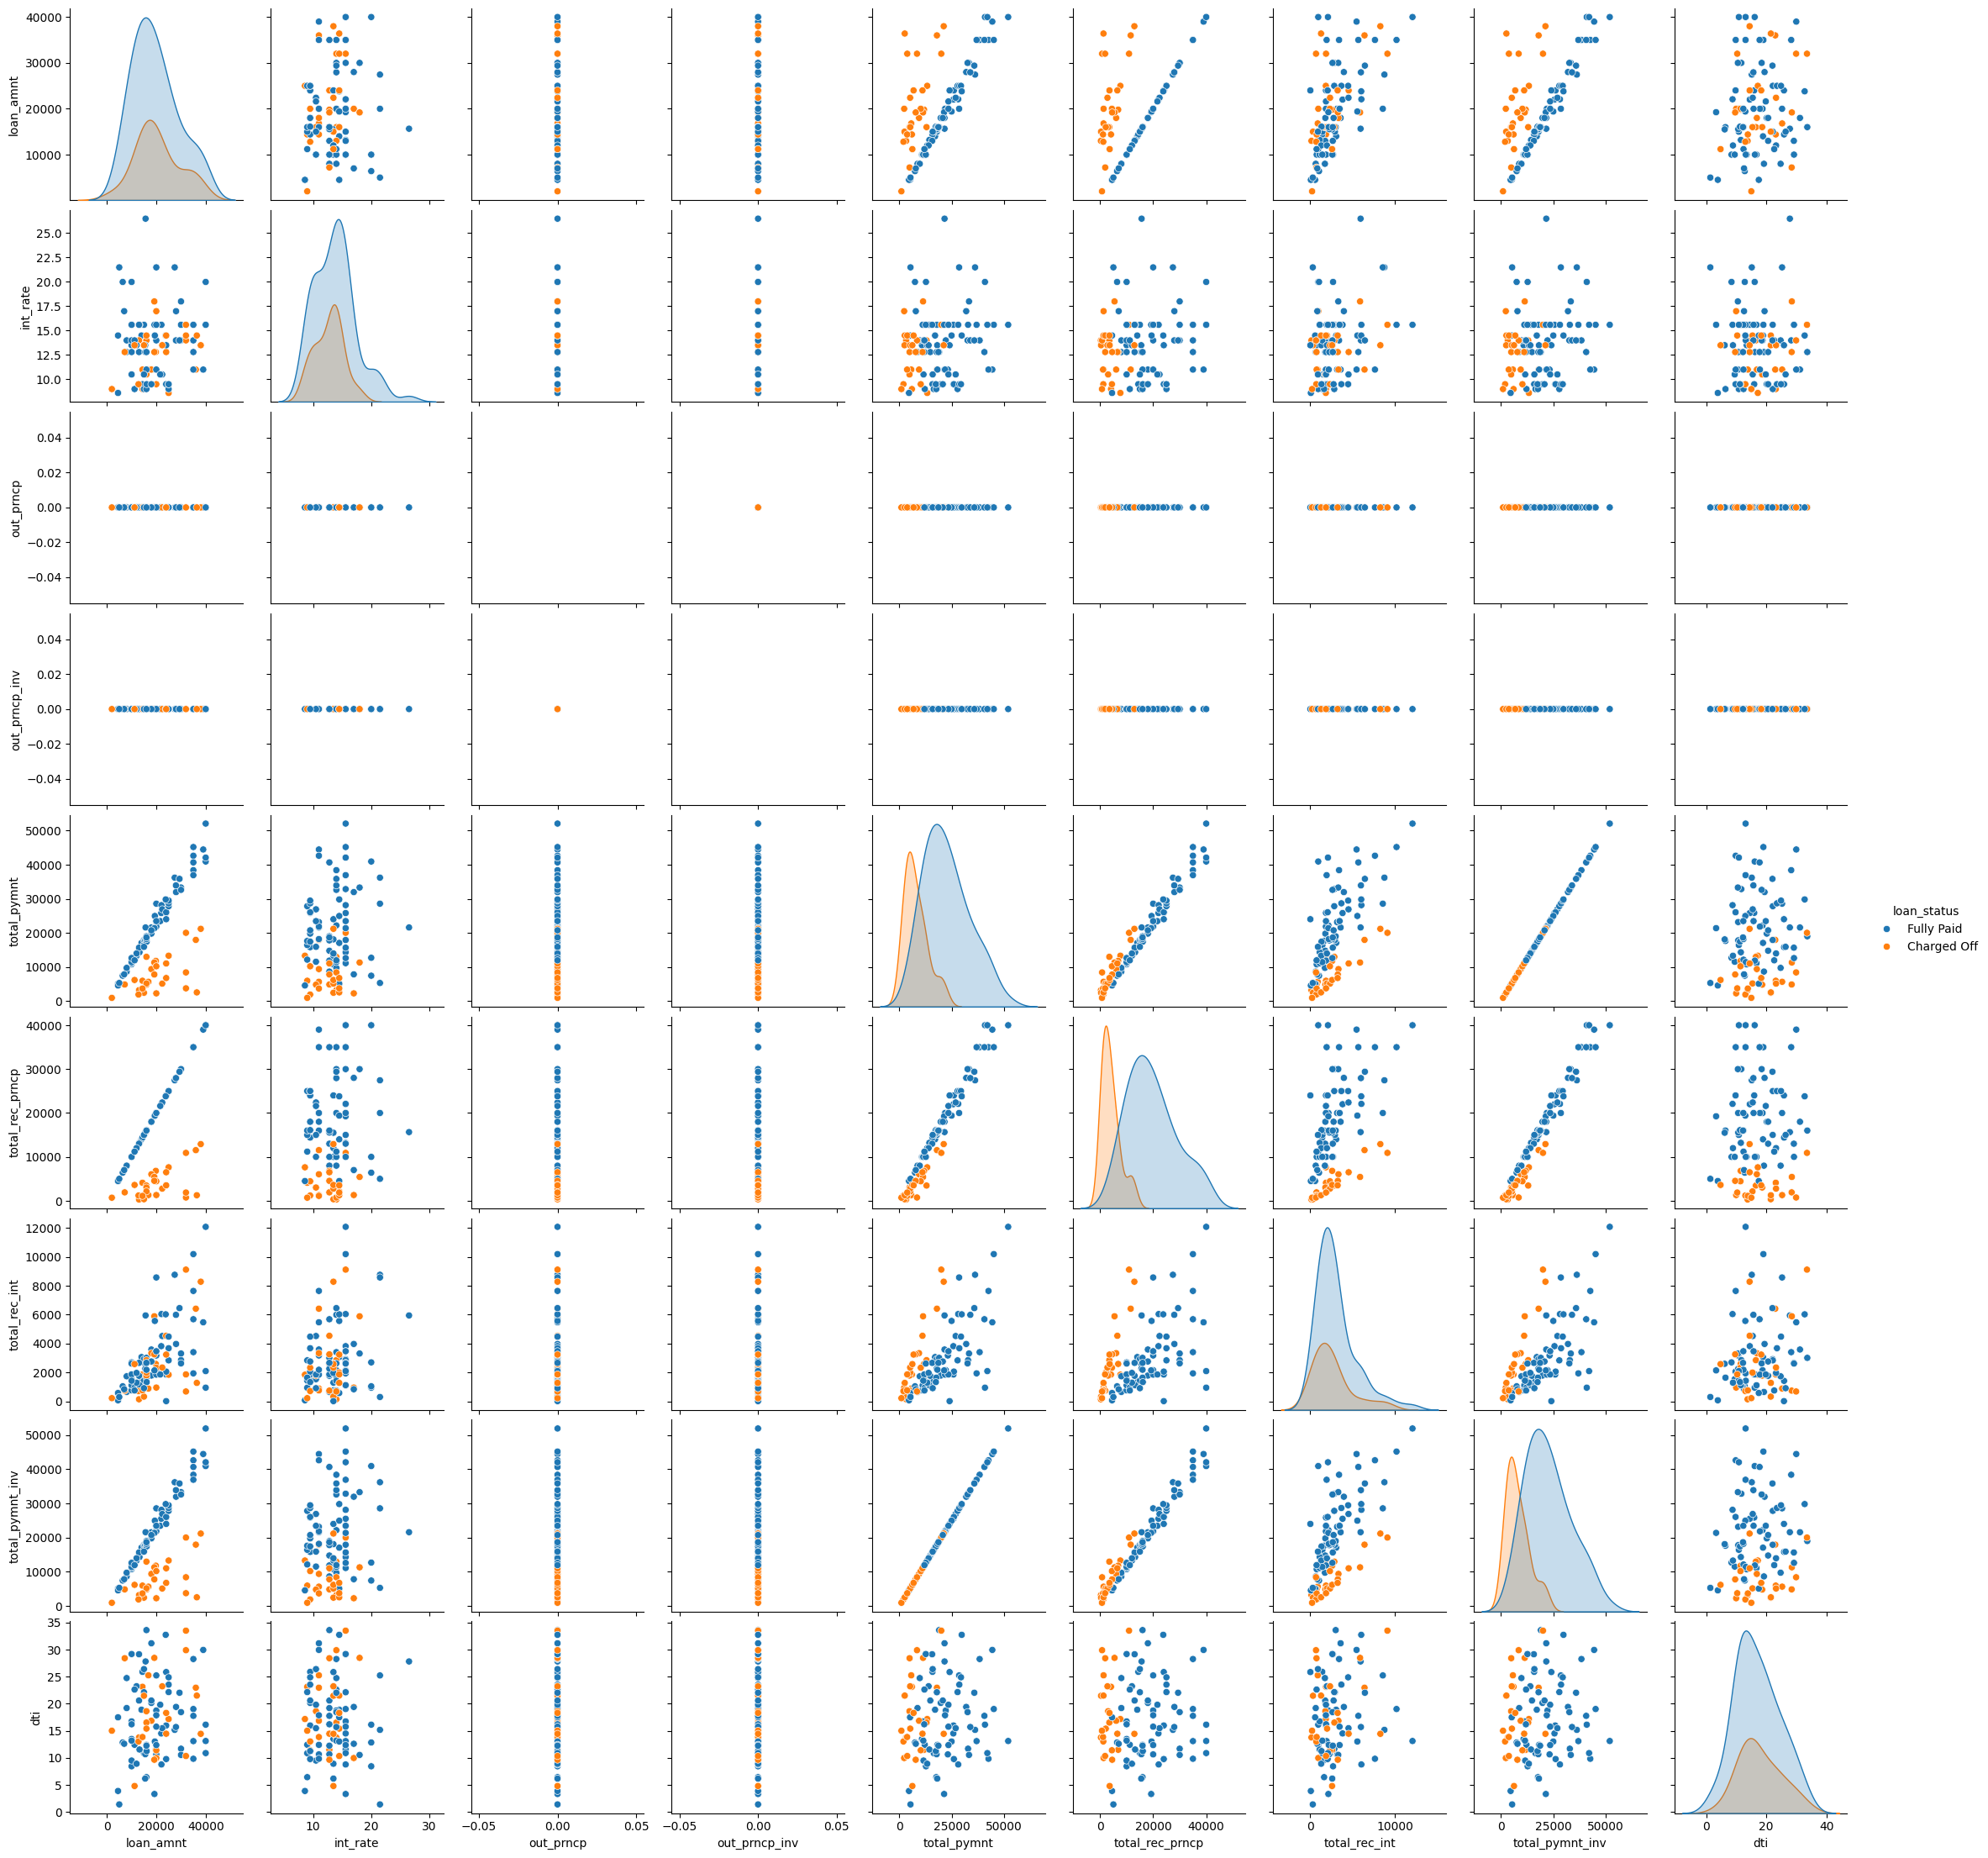

In [ ]:
#paiplot to define loan characteristics, to analyze which is direct feature related to loan charged off or default
sns.pairplot(data = df_loan_amt, hue = 'loan_status')

In [ ]:

df_cleaned[df_cleaned['out_prncp']!=0][['loan_amnt','term','int_rate','out_prncp','out_prncp_inv','total_pymnt','total_rec_prncp','total_rec_int','total_pymnt_inv','dti', 'loan_status']]

,loan_amnt,term,int_rate,out_prncp,out_prncp_inv,total_pymnt,total_rec_prncp,total_rec_int,total_pymnt_inv,dti,loan_status
29665,35000.00,60 months,20.99,21999.94,21999.94,30603.57,13000.06,17556.18,30603.57,25.36,Default
376746,30000.00,36 months,17.47,25320.47,25320.47,7507.22,4679.53,2827.69,7507.22,23.26,Default
388402,25000.00,60 months,21.45,22991.22,22991.22,6832.88,2008.78,4789.97,6832.88,2.20,Default
396333,3000.00,36 months,19.03,2305.04,2305.04,1327.01,694.96,587.05,1327.01,0.86,Default
405380,20000.00,60 months,25.82,9321.75,9321.75,15962.10,10678.25,5283.85,15962.10,10.70,Default
408794,5000.00,36 months,19.03,3510.59,3510.59,2571.39,1489.41,1066.98,2571.39,32.59,Default
415193,9600.00,36 months,10.91,6213.22,6213.22,4791.40,3386.78,1326.17,4791.40,14.56,Default
426971,16000.00,36 months,7.97,9050.79,9050.79,8587.99,6949.21,1563.60,8587.99,14.40,Default
437689,5000.00,36 months,19.03,2792.69,2792.69,3568.55,2207.31,1271.24,3568.55,25.46,Default
468357,4000.00,36 months,11.47,468.01,468.01,4302.76,3531.99,770.77,4302.76,9.87,Default


In [ ]:
# df_loan_amt['total_rec_prncp'] != df_loan_amt['loan_amnt']

df_loan_amt[df_loan_amt['total_rec_prncp']!= df_loan_amt['loan_amnt']]

,loan_amnt,term,int_rate,out_prncp,out_prncp_inv,total_pymnt,total_rec_prncp,total_rec_int,total_pymnt_inv,dti,loan_status
1252095,36000.00,60 months,10.99,0.00,0.00,17943.70,11535.29,6408.41,17943.70,22.96,Charged Off
1252097,14400.00,60 months,8.99,0.00,0.00,5959.22,4104.06,1855.16,5959.22,23.13,Charged Off
1252103,25000.00,36 months,8.59,0.00,0.00,13301.42,7631.18,1839.77,13301.42,17.17,Charged Off
1252104,16800.00,60 months,10.99,0.00,0.00,5653.05,1297.37,883.51,5653.05,25.25,Charged Off
1252114,20000.00,36 months,16.99,0.00,0.00,2258.55,1307.73,950.82,2258.55,9.97,Charged Off
1252122,19800.00,36 months,12.79,0.00,0.00,11789.44,6817.24,2586.16,11789.44,11.49,Charged Off
1252125,13000.00,36 months,13.99,0.00,0.00,3189.62,292.69,141.46,3189.62,13.77,Charged Off
1252128,7200.00,36 months,12.79,0.00,0.00,4858.99,1916.39,739.06,4858.99,28.41,Charged Off
1252131,18000.00,60 months,10.99,0.00,0.00,9379.73,6047.02,3332.71,9379.73,16.85,Charged Off
1252132,32000.00,60 months,15.59,0.00,0.00,20024.26,10912.28,9111.98,20024.26,33.50,Charged Off


<Axes: xlabel='loan_amnt', ylabel='total_recieved_payment_test'>

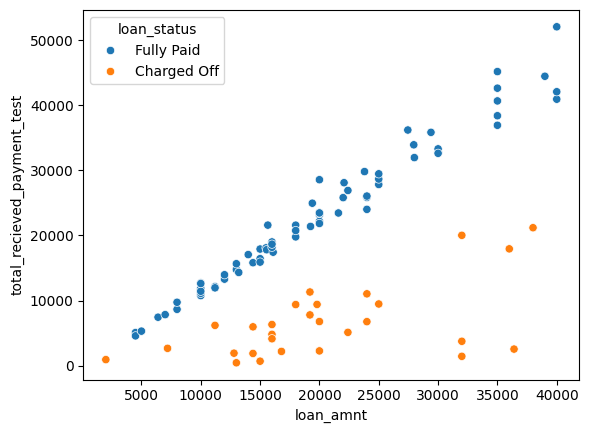

In [ ]:
df_loan_amt['total_recieved_payment_test'] = df_loan_amt['total_rec_int']+df_loan_amt['total_rec_prncp']
sns.scatterplot(x ='loan_amnt', y = 'total_recieved_payment_test', data = df_loan_amt, hue = 'loan_status')


In [ ]:
df_cleaned_no_default.isna().mean()*100
#percentage of null values

,0
id,0.00
loan_amnt,0.00
funded_amnt,0.00
funded_amnt_inv,0.00
term,0.00
int_rate,0.00
installment,0.00
grade,0.00
sub_grade,0.00
emp_title,6.22


In [ ]:
df_cleaned_no_default['loan_status'].value_counts()

,count
loan_status,
Fully Paid,977984
Charged Off,247786


In [ ]:
#  Performed part of EDA using visualisation

<Axes: xlabel='loan_amnt', ylabel='Count'>

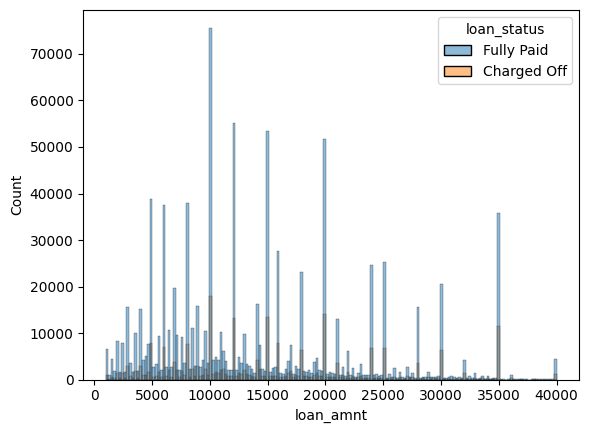

In [ ]:
sns.histplot(x = 'loan_amnt', hue ='loan_status', data = df_cleaned_no_default) #histplot for loan amout

<Axes: xlabel='dti', ylabel='Count'>

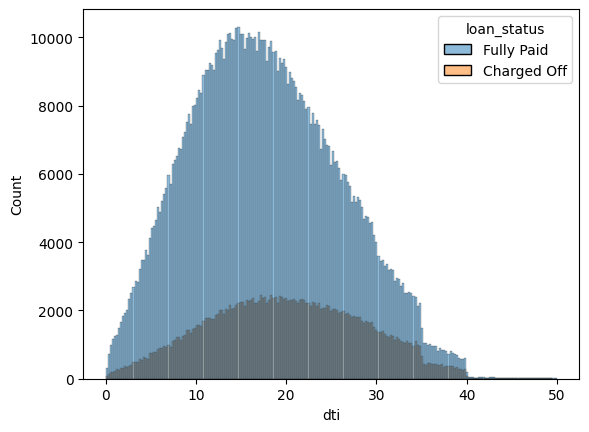

In [ ]:
sns.histplot(x = 'dti', hue ='loan_status', data = df_cleaned_no_default)
#both are normally distributed just charged off are slightly increases more with increase in dti

<Axes: xlabel='last_fico_range_high', ylabel='Count'>

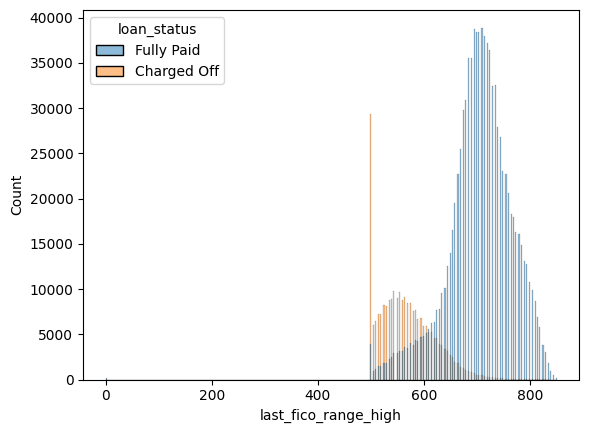

In [ ]:

sns.histplot(x = 'last_fico_range_high', hue ='loan_status', data = df_cleaned_no_default)
#fico range latest is one the the important factor to decide if the loan will default, higher FICO low risk od default
#but this suggests last fico it could be when loans were accessed when the loans were already defaulted so these will not be considered in our research

<Axes: xlabel='grade', ylabel='count'>

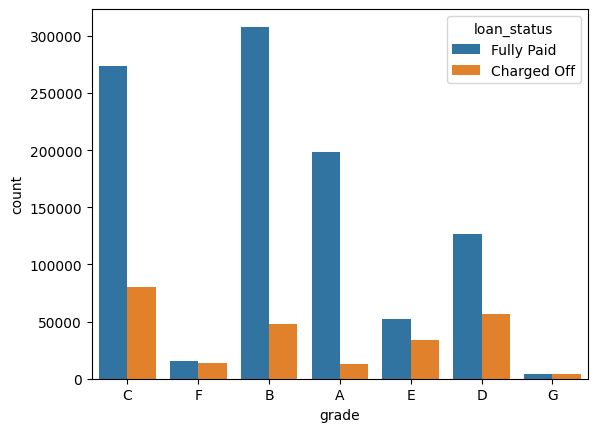

In [ ]:
sns.countplot(x ='grade', hue = 'loan_status' , data = df_cleaned_no_default) #count plot of grades
#Grade A and B  have less charged off comparatively

<Axes: xlabel='sub_grade', ylabel='count'>

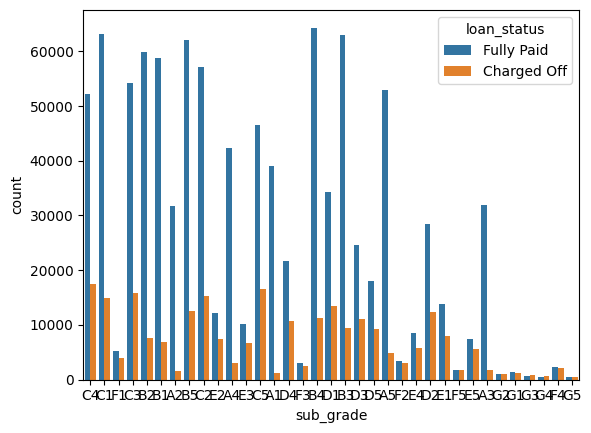

In [ ]:
sns.countplot(x ='sub_grade', hue = 'loan_status' , data = df_cleaned_no_default)
# not clear understanding based on subgrade , this needs to further check

In [ ]:
cat_col1 = ['grade', 'sub_grade']

In [ ]:
df_cleaned['loan_status'].value_counts()

,count
loan_status,
Fully Paid,977984
Charged Off,247786
Default,34


In [ ]:
df_cleaned_no_default1 = df_cleaned_no_default.copy()
#create the copy of dataframe

In [ ]:
df_cleaned_no_default1.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt_inv,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,68407277,3600.00,3600.00,3600.00,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.00,Not Verified,Dec-2015,Fully Paid,n,debt_consolidation,PA,5.91,0.00,Aug-2003,675.00,679.00,1.00,30.00,NaN,7.00,0.00,2765.00,29.70,13.00,w,4421.72,821.72,0.00,0.00,0.00,Jan-2019,122.67,Mar-2019,564.00,560.00,0.00,30.00,1.00,0.00,722.00,144904.00,2.00,2.00,0.00,1.00,21.00,4981.00,36.00,3.00,3.00,722.00,34.00,9300.00,3.00,1.00,4.00,4.00,20701.00,1506.00,37.20,0.00,0.00,148.00,128.00,3.00,3.00,1.00,4.00,69.00,4.00,69.00,2.00,2.00,4.00,2.00,5.00,3.00,4.00,9.00,4.00,7.00,0.00,0.00,0.00,3.00,76.90,0.00,0.00,0.00,178050.00,7746.00,2400.00,13734.00,N,Cash,N
1,68355089,24700.00,24700.00,24700.00,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.00,Not Verified,Dec-2015,Fully Paid,n,small_business,SD,16.06,1.00,Dec-1999,715.00,719.00,4.00,6.00,NaN,22.00,0.00,21470.00,19.20,38.00,w,25679.66,979.66,0.00,0.00,0.00,Jun-2016,926.35,Mar-2019,699.00,695.00,0.00,NaN,1.00,0.00,0.00,204396.00,1.00,1.00,0.00,1.00,19.00,18005.00,73.00,2.00,3.00,6472.00,29.00,111800.00,0.00,0.00,6.00,4.00,9733.00,57830.00,27.10,0.00,0.00,113.00,192.00,2.00,2.00,4.00,2.00,NaN,0.00,6.00,0.00,5.00,5.00,13.00,17.00,6.00,20.00,27.00,5.00,22.00,0.00,0.00,0.00,2.00,97.40,7.70,0.00,0.00,314017.00,39475.00,79300.00,24667.00,N,Cash,N
3,68476807,10400.00,10400.00,10400.00,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.00,Source Verified,Dec-2015,Fully Paid,n,major_purchase,PA,25.37,1.00,Jun-1998,695.00,699.00,3.00,12.00,NaN,12.00,0.00,21929.00,64.50,35.00,w,11740.50,1340.50,0.00,0.00,0.00,Jul-2016,10128.96,Mar-2018,704.00,700.00,0.00,NaN,1.00,0.00,0.00,331730.00,1.00,3.00,0.00,3.00,14.00,73839.00,84.00,4.00,7.00,9702.00,78.00,34000.00,2.00,1.00,3.00,10.00,27644.00,4567.00,77.50,0.00,0.00,128.00,210.00,4.00,4.00,6.00,4.00,12.00,1.00,12.00,0.00,4.00,6.00,5.00,9.00,10.00,7.00,19.00,6.00,12.00,0.00,0.00,0.00,4.00,96.60,60.00,0.00,0.00,439570.00,95768.00,20300.00,88097.00,N,Cash,N
4,68426831,11950.00,11950.00,11950.00,36 months,13.44,405.18,C,C3,Veterinary Tecnician,4 years,RENT,34000.00,Source Verified,Dec-2015,Fully Paid,n,debt_consolidation,GA,10.20,0.00,Oct-1987,690.00,694.00,0.00,NaN,NaN,5.00,0.00,8822.00,68.40,6.00,w,13708.95,1758.95,0.00,0.00,0.00,May-2017,7653.56,May-2017,759.00,755.00,0.00,NaN,1.00,0.00,0.00,12798.00,0.00,1.00,0.00,0.00,338.00,3976.00,99.00,0.00,0.00,4522.00,76.00,12900.00,0.00,0.00,0.00,0.00,2560.00,844.00,91.00,0.00

In [ ]:
df_cleaned_no_default1['loan_status'].value_counts()

,count
loan_status,
Fully Paid,977984
Charged Off,247786


In [ ]:
#label encoding the target feature, as our focus to differentiate loan defaults , charged off is labelled as 1 and fully paid as 0
dict = {'Fully Paid': 0, 'Charged Off': 1}
df_cleaned_no_default1['loan_status'] = df_cleaned_no_default1['loan_status'].map(dict)

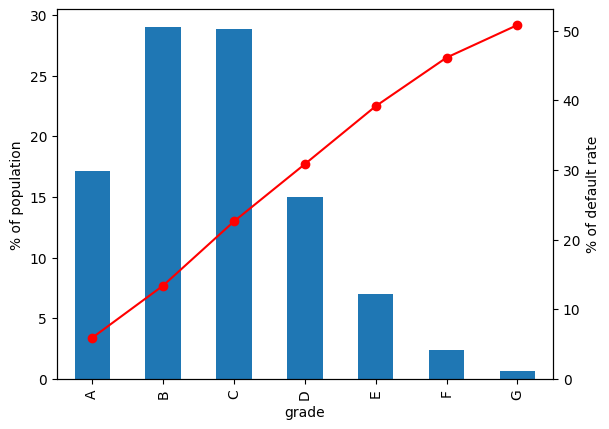

loan_status       0      1  default_rate     Total  Total%
grade                                                     
A            198041  12474          5.93 210515.00   17.17
B            307982  47710         13.41 355692.00   29.02
C            273344  79932         22.63 353276.00   28.82
D            126918  56622         30.85 183540.00   14.97
E             52059  33513         39.16  85572.00    6.98
F             15596  13358         46.14  28954.00    2.36
G              4044   4177         50.81   8221.00    0.67


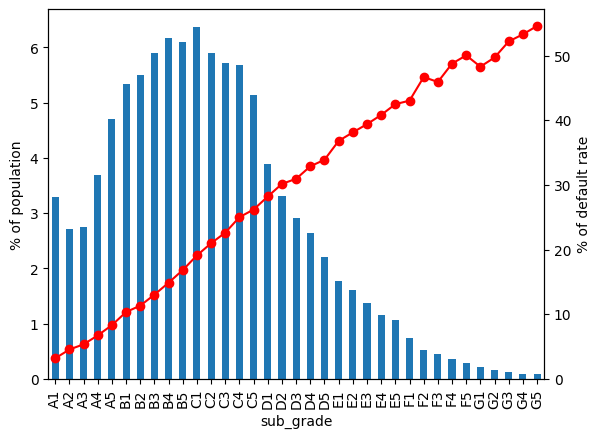

loan_status      0      1  default_rate    Total  Total%
sub_grade                                               
A1           39047   1288          3.19 40335.00    3.29
A2           31802   1518          4.56 33320.00    2.72
A3           32003   1811          5.36 33814.00    2.76
A4           42271   3052          6.73 45323.00    3.70
A5           52918   4805          8.32 57723.00    4.71
B1           58717   6782         10.35 65499.00    5.34
B2           59865   7657         11.34 67522.00    5.51
B3           62912   9432         13.04 72344.00    5.90
B4           64344  11254         14.89 75598.00    6.17
B5           62144  12585         16.84 74729.00    6.10
C1           63168  14928         19.11 78096.00    6.37
C2           57206  15197         20.99 72403.00    5.91
C3           54250  15868         22.63 70118.00    5.72
C4           52221  17430         25.02 69651.00    5.68
C5           46499  16509         26.20 63008.00    5.14
D1           34200  13448      

In [ ]:
#code partially adapted from the principle of datascience module coursework
for col in cat_col1: #Analysing default rate against overall population grade and subgrades
    x =pd.crosstab(df_cleaned_no_default1[col], df_cleaned_no_default1['loan_status'])
    x['default_rate'] = (x.values[:,1] /(x.values[:,0]+x.values[:,1]))*100
    x['Total'] = x.values[:,0]+x.values[:,1]
    x['Total%'] = (x.Total/sum(x.Total))*100

    fig, ax = plt.subplots()
    x['Total%'].plot(kind='bar')
    plt.xlabel(f'{col}')
    plt.ylabel("% of population")
    ax.set_ylim(ymin=0)
    ax2 = ax.twinx()
    x['default_rate'].plot(kind='line', color = 'red', marker = 'o')
    plt.ylabel("% of default rate")
    ax2.set_ylim(ymin = 0)
    plt.show()
    print(x)

In [ ]:
#some numerical features analysis done using pareto chart


In [ ]:
def pareto_chart_analysis(df, col, status_col='loan_status', bins=20):
    #

    col_bins = f'{col}_bins'
    df[col_bins] = pd.cut(df[col], bins=bins)  #Create income bins




    default_rates = df.groupby(col_bins).agg({ #default rate of different bins of numerical values
        status_col: 'mean',
        col: 'count'
    }).reset_index()
    print(default_rates)
    default_rates.columns = [col_bins, 'default_rate', 'count']
    default_rates['default_rate'] *= 100  #convert the default rate to percentage


    default_rates = default_rates.sort_values('count', ascending=False) # sort them in descending order


    default_rates['cumulative_frequncy_percent'] = default_rates['count'].cumsum() / default_rates['count'].sum() * 100 # cumulative percentage


    fig, ax1 = plt.subplots(figsize=(12, 6))   # define subplots

    ax1.bar(range(len(default_rates)), default_rates['count'], alpha=0.8)
    ax1.set_xlabel(f'{col} bins')
    ax1.set_ylabel('total numberof Loans')
    ax1.set_title(f'Pareto chart of {col} vs default rates of loans')


    plt.xticks(range(len(default_rates)), [str(bin) for bin in default_rates[col_bins]], rotation=90) #rotate the

    ax2 = ax1.twinx()   # Line plot for cumulative frequency percentage in twin axis
    ax2.plot(range(len(default_rates)), default_rates['cumulative_frequncy_percent'], color='red', marker='o')
    ax2.set_ylabel('Cumulative frequency Percentage of Loans')

    ax3 = ax1.twinx() # Line plot for default rate loans
    ax3.spines['right'].set_position(('axes', 1.1))  # perform offset on right spines
    ax3.plot(range(len(default_rates)), default_rates['default_rate'], color='blue', marker='s')
    ax3.set_ylabel('Default Rate (%) of loans')

    lines_1, labels_1 = ax1.get_legend_handles_labels() #add legends
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    lines_3, labels_3 = ax3.get_legend_handles_labels()
    ax1.legend(lines_1 + lines_2 + lines_3, ['Loan Count', 'Cumulative frequency %', 'Default Rate %'], loc='upper left')

    plt.tight_layout()
    plt.show()

<ipython-input-69-eaf2bb59d013>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rates = df.groupby(col_bins).agg({ #default rate of different bins of numerical values


       int_rate_bins  loan_status  int_rate
0     (5.284, 6.594]         0.04     63479
1     (6.594, 7.878]         0.06     81163
2     (7.878, 9.162]         0.10    114053
3    (9.162, 10.446]         0.12    103097
4    (10.446, 11.73]         0.15    147835
5    (11.73, 13.014]         0.18    144164
6   (13.014, 14.298]         0.22    125189
7   (14.298, 15.582]         0.24     95390
8   (15.582, 16.866]         0.27     88636
9    (16.866, 18.15]         0.31     79544
10   (18.15, 19.434]         0.34     57827
11  (19.434, 20.718]         0.35     35518
12  (20.718, 22.002]         0.38     27040
13  (22.002, 23.286]         0.40     15733
14   (23.286, 24.57]         0.40     15778
15   (24.57, 25.854]         0.45     14493
16  (25.854, 27.138]         0.48      6804
17  (27.138, 28.422]         0.52      2226
18  (28.422, 29.706]         0.50      3156
19   (29.706, 30.99]         0.49      4645


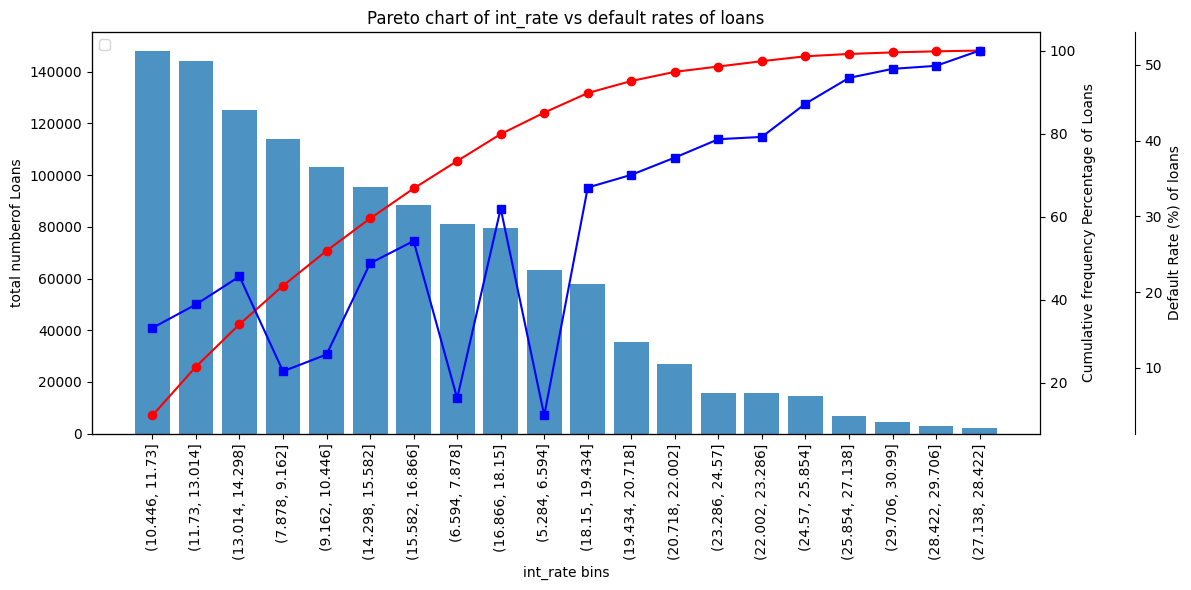

In [ ]:
pareto_chart_analysis(df_cleaned_no_default1, col='int_rate', status_col='loan_status', bins=20)

<ipython-input-69-eaf2bb59d013>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rates = df.groupby(col_bins).agg({ #default rate of different bins of numerical values


        loan_amnt_bins  loan_status  loan_amnt
0      (961.0, 2950.0]         0.14      41064
1     (2950.0, 4900.0]         0.16      76210
2     (4900.0, 6850.0]         0.16     131135
3     (6850.0, 8800.0]         0.17     117627
4    (8800.0, 10750.0]         0.19     151415
5   (10750.0, 12700.0]         0.21     113739
6   (12700.0, 14650.0]         0.22      62399
7   (14650.0, 16600.0]         0.22     120525
8   (16600.0, 18550.0]         0.23      59242
9   (18550.0, 20500.0]         0.23      89680
10  (20500.0, 22450.0]         0.24      36754
11  (22450.0, 24400.0]         0.23      45997
12  (24400.0, 26350.0]         0.22      42354
13  (26350.0, 28300.0]         0.21      29571
14  (28300.0, 30250.0]         0.25      34569
15  (30250.0, 32200.0]         0.27      10544
16  (32200.0, 34150.0]         0.25       6635
17  (34150.0, 36100.0]         0.24      49845
18  (36100.0, 38050.0]         0.19        476
19  (38050.0, 40000.0]         0.20       5989


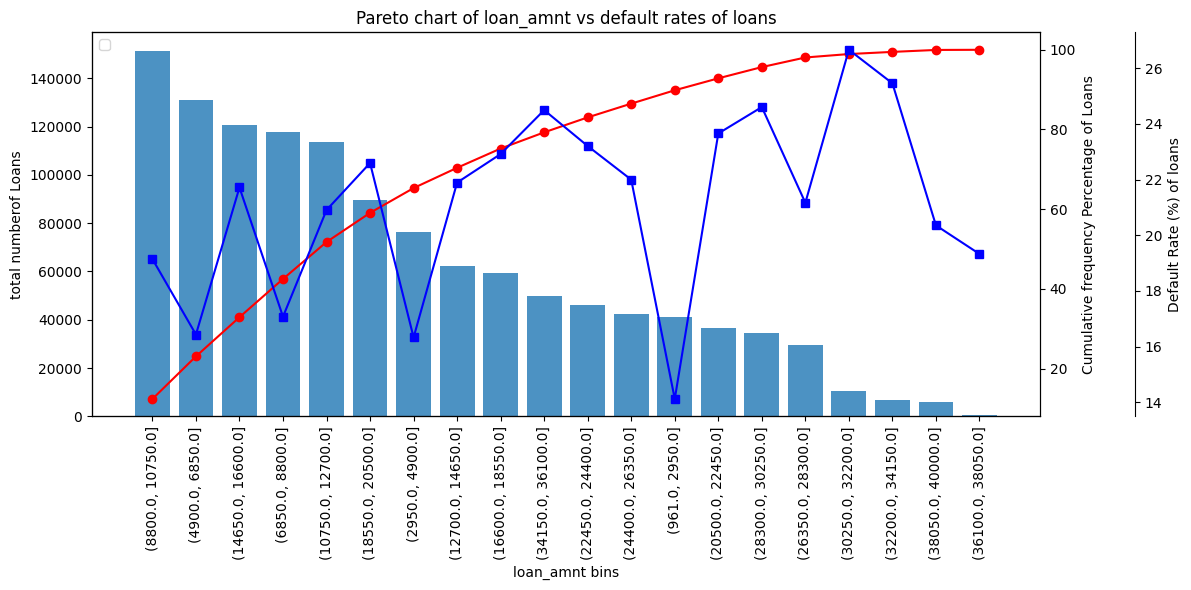

In [ ]:
pareto_chart_analysis(df_cleaned_no_default1, col='loan_amnt', status_col='loan_status', bins=20)

<ipython-input-69-eaf2bb59d013>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rates = df.groupby(col_bins).agg({ #default rate of different bins of numerical values


            dti_bins  loan_status     dti
0     (-0.04, 2.508]         0.16   17330
1     (2.508, 5.005]         0.14   40531
2     (5.005, 7.502]         0.15   67089
3      (7.502, 10.0]         0.15   93100
4     (10.0, 12.498]         0.16  116313
5   (12.498, 14.995]         0.17  131722
6   (14.995, 17.493]         0.19  134175
7    (17.493, 19.99]         0.20  129886
8    (19.99, 22.488]         0.21  117285
9   (22.488, 24.985]         0.23  102868
10  (24.985, 27.482]         0.25   86950
11   (27.482, 29.98]         0.26   71610
12   (29.98, 32.478]         0.28   49598
13  (32.478, 34.975]         0.30   38823
14  (34.975, 37.472]         0.31   15423
15   (37.472, 39.97]         0.32   11134
16   (39.97, 42.468]         0.35     729
17  (42.468, 44.965]         0.36     534
18  (44.965, 47.462]         0.39     387
19   (47.462, 49.96]         0.39     283


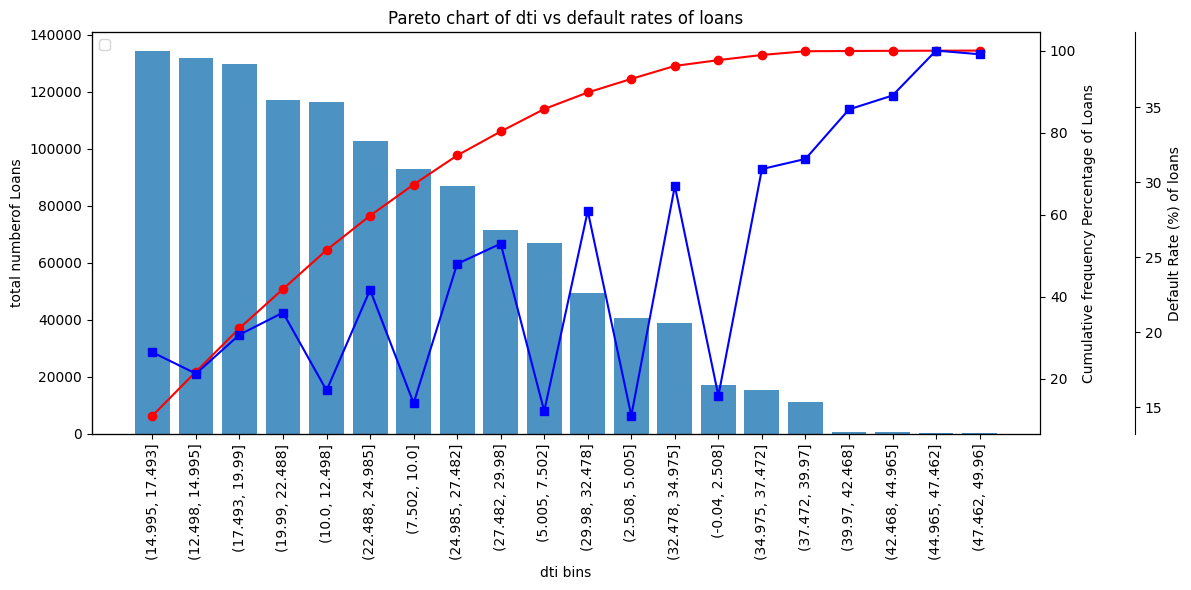

In [ ]:
pareto_chart_analysis(df_cleaned_no_default1, col='dti', status_col='loan_status', bins=20)

<ipython-input-69-eaf2bb59d013>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rates = df.groupby(col_bins).agg({ #default rate of different bins of numerical values


             annual_inc_bins  loan_status  annual_inc
0        (-8997.2, 551860.0]         0.20     1224450
1      (551860.0, 1101720.0]         0.12        1099
2     (1101720.0, 1651580.0]         0.08         111
3     (1651580.0, 2201440.0]         0.13          23
4     (2201440.0, 2751300.0]         0.08          12
5     (2751300.0, 3301160.0]         0.36          14
6     (3301160.0, 3851020.0]         0.25           4
7     (3851020.0, 4400880.0]         0.33           9
8     (4400880.0, 4950740.0]         0.25           8
9     (4950740.0, 5500600.0]         0.25           4
10    (5500600.0, 6050460.0]         0.29           7
11    (6050460.0, 6600320.0]         0.33           3
12    (6600320.0, 7150180.0]         0.00           7
13    (7150180.0, 7700040.0]         0.25           4
14    (7700040.0, 8249900.0]         0.00           1
15    (8249900.0, 8799760.0]         0.17           6
16    (8799760.0, 9349620.0]         0.25           4
17    (9349620.0, 9899480.0]

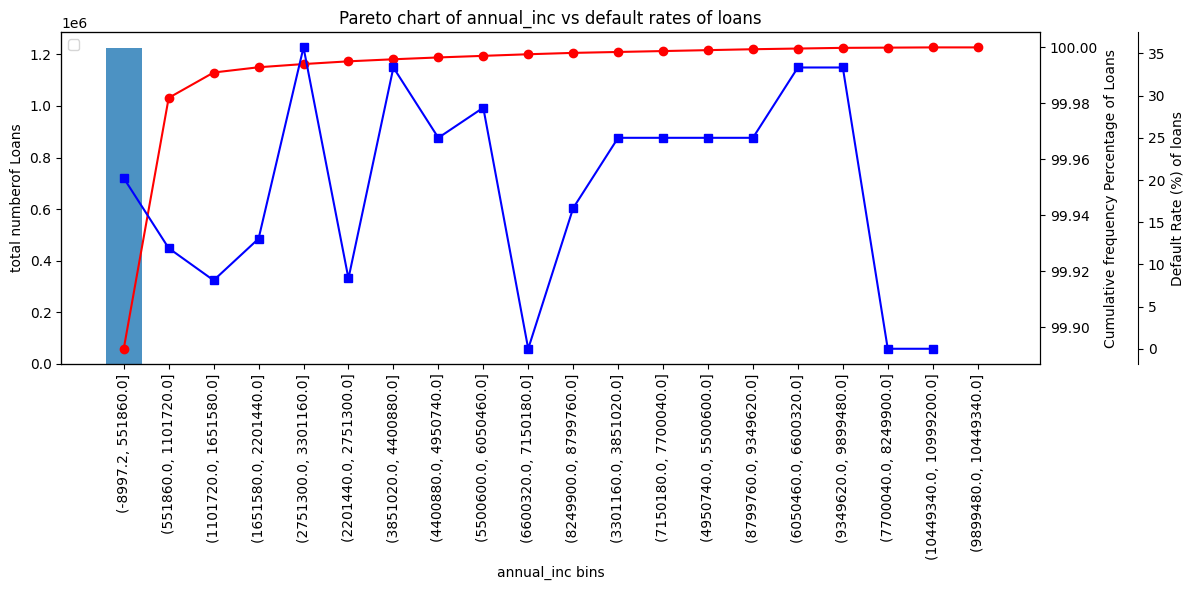

In [ ]:
pareto_chart_analysis(df_cleaned_no_default1, col='annual_inc', status_col='loan_status', bins=20)

<Axes: >

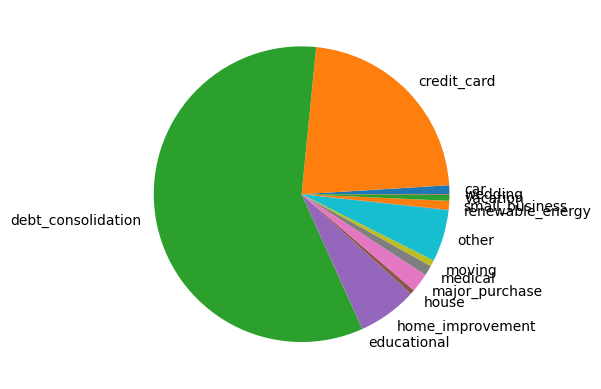

In [ ]:
df_cleaned_no_default1.groupby('purpose').size().plot(kind='pie')
#maximum loans are taken are debt consolidation and then credit card loans

<Axes: xlabel='count', ylabel='purpose'>

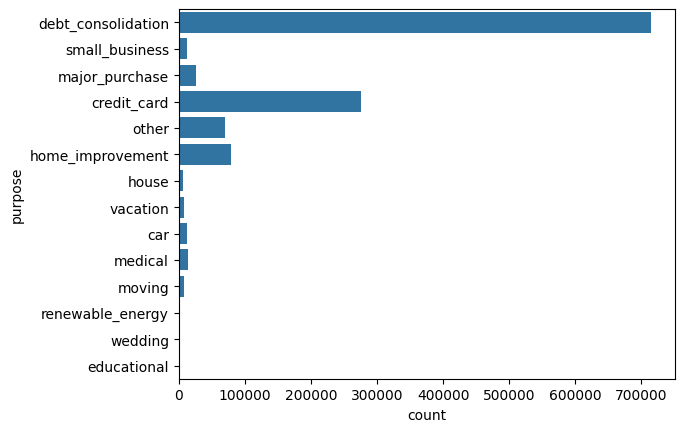

In [ ]:
sns.countplot(y = df_cleaned_no_default1['purpose'], data = df_cleaned_no_default1) # renewable_energy , wedding, educational can be put into others

In [ ]:
#Handling discrete categorical features : purpose and employement title

In [ ]:
df_cleaned_no_default['purpose'].value_counts()

,count
purpose,
debt_consolidation,714750
credit_card,275310
home_improvement,79452
other,69254
major_purchase,25303
medical,13750
small_business,11942
car,11898
moving,8300


In [ ]:
#renewable energy, wedding and educational purpose are very less in counts, categorize them in others
counts_of_pupose = df_cleaned_no_default['purpose'].value_counts()

bottom_three_purpose= counts_of_pupose.nsmallest(3).index.tolist() #bottom three features

def categorise_purpose(purpose): #function to define last three purpose as others
    return 'others' if purpose in bottom_three_purpose else purpose


df_cleaned_no_default['purpose_category'] = df_cleaned_no_default['purpose'].apply(categorise_purpose) #appy the function and create new column with aggregated category
print(df_cleaned_no_default['purpose_category'].value_counts()) #print new category column

purpose_category
debt_consolidation    714750
credit_card           275310
home_improvement       79452
other                  69254
major_purchase         25303
medical                13750
small_business         11942
car                    11898
moving                  8300
vacation                8193
house                   6264
others                  1354
Name: count, dtype: int64


In [ ]:
df_cleaned_no_default.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt_inv,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,purpose_category
0,68407277,3600.00,3600.00,3600.00,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.00,Not Verified,Dec-2015,Fully Paid,n,debt_consolidation,PA,5.91,0.00,Aug-2003,675.00,679.00,1.00,30.00,NaN,7.00,0.00,2765.00,29.70,13.00,w,4421.72,821.72,0.00,0.00,0.00,Jan-2019,122.67,Mar-2019,564.00,560.00,0.00,30.00,1.00,0.00,722.00,144904.00,2.00,2.00,0.00,1.00,21.00,4981.00,36.00,3.00,3.00,722.00,34.00,9300.00,3.00,1.00,4.00,4.00,20701.00,1506.00,37.20,0.00,0.00,148.00,128.00,3.00,3.00,1.00,4.00,69.00,4.00,69.00,2.00,2.00,4.00,2.00,5.00,3.00,4.00,9.00,4.00,7.00,0.00,0.00,0.00,3.00,76.90,0.00,0.00,0.00,178050.00,7746.00,2400.00,13734.00,N,Cash,N,debt_consolidation
1,68355089,24700.00,24700.00,24700.00,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.00,Not Verified,Dec-2015,Fully Paid,n,small_business,SD,16.06,1.00,Dec-1999,715.00,719.00,4.00,6.00,NaN,22.00,0.00,21470.00,19.20,38.00,w,25679.66,979.66,0.00,0.00,0.00,Jun-2016,926.35,Mar-2019,699.00,695.00,0.00,NaN,1.00,0.00,0.00,204396.00,1.00,1.00,0.00,1.00,19.00,18005.00,73.00,2.00,3.00,6472.00,29.00,111800.00,0.00,0.00,6.00,4.00,9733.00,57830.00,27.10,0.00,0.00,113.00,192.00,2.00,2.00,4.00,2.00,NaN,0.00,6.00,0.00,5.00,5.00,13.00,17.00,6.00,20.00,27.00,5.00,22.00,0.00,0.00,0.00,2.00,97.40,7.70,0.00,0.00,314017.00,39475.00,79300.00,24667.00,N,Cash,N,small_business
3,68476807,10400.00,10400.00,10400.00,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.00,Source Verified,Dec-2015,Fully Paid,n,major_purchase,PA,25.37,1.00,Jun-1998,695.00,699.00,3.00,12.00,NaN,12.00,0.00,21929.00,64.50,35.00,w,11740.50,1340.50,0.00,0.00,0.00,Jul-2016,10128.96,Mar-2018,704.00,700.00,0.00,NaN,1.00,0.00,0.00,331730.00,1.00,3.00,0.00,3.00,14.00,73839.00,84.00,4.00,7.00,9702.00,78.00,34000.00,2.00,1.00,3.00,10.00,27644.00,4567.00,77.50,0.00,0.00,128.00,210.00,4.00,4.00,6.00,4.00,12.00,1.00,12.00,0.00,4.00,6.00,5.00,9.00,10.00,7.00,19.00,6.00,12.00,0.00,0.00,0.00,4.00,96.60,60.00,0.00,0.00,439570.00,95768.00,20300.00,88097.00,N,Cash,N,major_purchase
4,68426831,11950.00,11950.00,11950.00,36 months,13.44,405.18,C,C3,Veterinary Tecnician,4 years,RENT,34000.00,Source Verified,Dec-2015,Fully Paid,n,debt_consolidation,GA,10.20,0.00,Oct-1987,690.00,694.00,0.00,NaN,NaN,5.00,0.00,8822.00,68.40,6.00,w,13708.95,1758.95,0.00,0.00,0.00,May-2017,7653.56,May-2017,759.00,755.00,0.00,NaN,1.00,0.00,0.00,12798.00,0.00,1.00,0.00,0.00,338.00,3976.00,99.00,0.00,0.00,45

In [ ]:
df_cleaned_no_default['emp_title'].value_counts()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df_cleaned_no_default['emp_title'].value_counts().head(20)


,count
emp_title,
Teacher,20456
Manager,19075
Owner,10049
Registered Nurse,8613
RN,8351
Supervisor,8085
Sales,7330
Driver,7324
Project Manager,6286


In [ ]:
df_cleaned_no_default['emp_title'].nunique()
#321247 employment title category, which is difficult to interpret or in modelling


321247

<Axes: xlabel='inq_last_6mths', ylabel='count'>

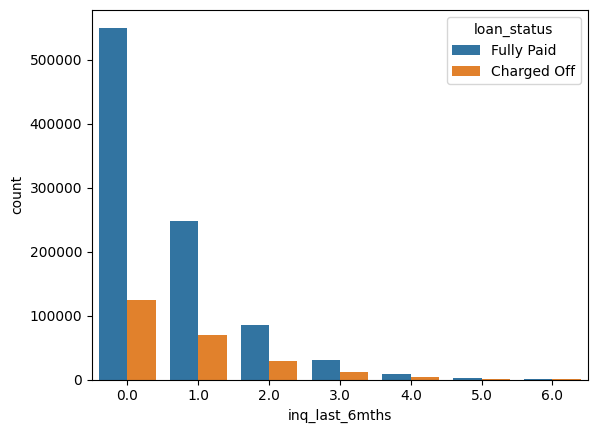

In [ ]:

sns.countplot(x = 'inq_last_6mths',data = df_cleaned_no_default, hue='loan_status')

In [ ]:
df_cleaned_no_default.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt_inv,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,purpose_category
0,68407277,3600.00,3600.00,3600.00,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.00,Not Verified,Dec-2015,Fully Paid,n,debt_consolidation,PA,5.91,0.00,Aug-2003,675.00,679.00,1.00,30.00,NaN,7.00,0.00,2765.00,29.70,13.00,w,4421.72,821.72,0.00,0.00,0.00,Jan-2019,122.67,Mar-2019,564.00,560.00,0.00,30.00,1.00,0.00,722.00,144904.00,2.00,2.00,0.00,1.00,21.00,4981.00,36.00,3.00,3.00,722.00,34.00,9300.00,3.00,1.00,4.00,4.00,20701.00,1506.00,37.20,0.00,0.00,148.00,128.00,3.00,3.00,1.00,4.00,69.00,4.00,69.00,2.00,2.00,4.00,2.00,5.00,3.00,4.00,9.00,4.00,7.00,0.00,0.00,0.00,3.00,76.90,0.00,0.00,0.00,178050.00,7746.00,2400.00,13734.00,N,Cash,N,debt_consolidation
1,68355089,24700.00,24700.00,24700.00,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.00,Not Verified,Dec-2015,Fully Paid,n,small_business,SD,16.06,1.00,Dec-1999,715.00,719.00,4.00,6.00,NaN,22.00,0.00,21470.00,19.20,38.00,w,25679.66,979.66,0.00,0.00,0.00,Jun-2016,926.35,Mar-2019,699.00,695.00,0.00,NaN,1.00,0.00,0.00,204396.00,1.00,1.00,0.00,1.00,19.00,18005.00,73.00,2.00,3.00,6472.00,29.00,111800.00,0.00,0.00,6.00,4.00,9733.00,57830.00,27.10,0.00,0.00,113.00,192.00,2.00,2.00,4.00,2.00,NaN,0.00,6.00,0.00,5.00,5.00,13.00,17.00,6.00,20.00,27.00,5.00,22.00,0.00,0.00,0.00,2.00,97.40,7.70,0.00,0.00,314017.00,39475.00,79300.00,24667.00,N,Cash,N,small_business
3,68476807,10400.00,10400.00,10400.00,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.00,Source Verified,Dec-2015,Fully Paid,n,major_purchase,PA,25.37,1.00,Jun-1998,695.00,699.00,3.00,12.00,NaN,12.00,0.00,21929.00,64.50,35.00,w,11740.50,1340.50,0.00,0.00,0.00,Jul-2016,10128.96,Mar-2018,704.00,700.00,0.00,NaN,1.00,0.00,0.00,331730.00,1.00,3.00,0.00,3.00,14.00,73839.00,84.00,4.00,7.00,9702.00,78.00,34000.00,2.00,1.00,3.00,10.00,27644.00,4567.00,77.50,0.00,0.00,128.00,210.00,4.00,4.00,6.00,4.00,12.00,1.00,12.00,0.00,4.00,6.00,5.00,9.00,10.00,7.00,19.00,6.00,12.00,0.00,0.00,0.00,4.00,96.60,60.00,0.00,0.00,439570.00,95768.00,20300.00,88097.00,N,Cash,N,major_purchase
4,68426831,11950.00,11950.00,11950.00,36 months,13.44,405.18,C,C3,Veterinary Tecnician,4 years,RENT,34000.00,Source Verified,Dec-2015,Fully Paid,n,debt_consolidation,GA,10.20,0.00,Oct-1987,690.00,694.00,0.00,NaN,NaN,5.00,0.00,8822.00,68.40,6.00,w,13708.95,1758.95,0.00,0.00,0.00,May-2017,7653.56,May-2017,759.00,755.00,0.00,NaN,1.00,0.00,0.00,12798.00,0.00,1.00,0.00,0.00,338.00,3976.00,99.00,0.00,0.00,45

In [ ]:
#-----We have removed features which we considered irrelevant now perform data cleaning and handling null values


In [ ]:
df_cleaned_no_default.isna().sum()

,0
id,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,76231


In [ ]:
df_cleaned_no_default['loan_status'].value_counts()

,count
loan_status,
Fully Paid,977984
Charged Off,247786


In [ ]:
#emp title: total null values 76231
#emp title null when loan defaulted 20124
df_cleaned_no_default[df_cleaned_no_default['loan_status']=='Fully Paid']['emp_title'].isna().sum()

56107

In [ ]:
df_cleaned_no_default[df_cleaned_no_default['loan_status']=='Charged Off']['emp_title'].isna().sum()

20124

In [ ]:
#functioned defined to fill null values with mode
def fill_null_Values_with_mode(df):

        original_nulls = df[['emp_title', 'emp_length']].isnull().sum() #count of nulls in emp title and emp_length


        df_filled = df.copy() #backup of df


        for col in ['emp_title', 'emp_length']: #impute null values with model
            mode_val = df_filled[col].mode()
            if len(mode_val) > 0:
                df_filled[col].fillna(mode_val[0], inplace=True)
            else:
                print(f"Warning: No mode found for {col}")


        nulls_after = df_filled[['emp_title', 'emp_length']].isnull().sum()
        nulls_filled = original_nulls - nulls_after

        print("Null values before filling:")
        print(original_nulls)
        print("\nNull values after filling:")
        print(nulls_after)
        print("\nNumber of null values filled:")
        print(nulls_filled)


        print("\ncommon values after imputing null values:") #print the common null values imputed
        for col in ['emp_title', 'emp_length']:
            print(f"\n{col}:")
            print(df_filled[col].value_counts().head())

        return df_filled



In [ ]:
df_cleaned_no_default = fill_null_Values_with_mode(df_cleaned_no_default)

<ipython-input-77-38f7f9309a99>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[col].fillna(mode_val[0], inplace=True)


Null values before filling:
emp_title     76231
emp_length    71681
dtype: int64

Null values after filling:
emp_title     0
emp_length    0
dtype: int64

Number of null values filled:
emp_title     76231
emp_length    71681
dtype: int64

common values after imputing null values:

emp_title:
emp_title
Teacher             96687
Manager             19075
Owner               10049
Registered Nurse     8613
RN                   8351
Name: count, dtype: int64

emp_length:
emp_length
10+ years    482868
2 years      110503
3 years       98009
< 1 year      93747
1 year        80326
Name: count, dtype: int64


In [ ]:
df_cleaned_no_default['loan_status'].value_counts()

,count
loan_status,
Fully Paid,977984
Charged Off,247786


In [ ]:
df_cleaned_no_default.isna().mean()*100

,0
id,0.00
loan_amnt,0.00
funded_amnt,0.00
funded_amnt_inv,0.00
term,0.00
int_rate,0.00
installment,0.00
grade,0.00
sub_grade,0.00
emp_title,0.00


In [ ]:
df_cleaned_no_default['pub_rec'].min()

0.0

In [ ]:

df_cleaned_no_default[df_cleaned_no_default['pub_rec'] == 0.0].head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt_inv,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,purpose_category
0,68407277,3600.00,3600.00,3600.00,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.00,Not Verified,Dec-2015,Fully Paid,n,debt_consolidation,PA,5.91,0.00,Aug-2003,675.00,679.00,1.00,30.00,NaN,7.00,0.00,2765.00,29.70,13.00,w,4421.72,821.72,0.00,0.00,0.00,Jan-2019,122.67,Mar-2019,564.00,560.00,0.00,30.00,1.00,0.00,722.00,144904.00,2.00,2.00,0.00,1.00,21.00,4981.00,36.00,3.00,3.00,722.00,34.00,9300.00,3.00,1.00,4.00,4.00,20701.00,1506.00,37.20,0.00,0.00,148.00,128.00,3.00,3.00,1.00,4.00,69.00,4.00,69.00,2.00,2.00,4.00,2.00,5.00,3.00,4.00,9.00,4.00,7.00,0.00,0.00,0.00,3.00,76.90,0.00,0.00,0.00,178050.00,7746.00,2400.00,13734.00,N,Cash,N,debt_consolidation
1,68355089,24700.00,24700.00,24700.00,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.00,Not Verified,Dec-2015,Fully Paid,n,small_business,SD,16.06,1.00,Dec-1999,715.00,719.00,4.00,6.00,NaN,22.00,0.00,21470.00,19.20,38.00,w,25679.66,979.66,0.00,0.00,0.00,Jun-2016,926.35,Mar-2019,699.00,695.00,0.00,NaN,1.00,0.00,0.00,204396.00,1.00,1.00,0.00,1.00,19.00,18005.00,73.00,2.00,3.00,6472.00,29.00,111800.00,0.00,0.00,6.00,4.00,9733.00,57830.00,27.10,0.00,0.00,113.00,192.00,2.00,2.00,4.00,2.00,NaN,0.00,6.00,0.00,5.00,5.00,13.00,17.00,6.00,20.00,27.00,5.00,22.00,0.00,0.00,0.00,2.00,97.40,7.70,0.00,0.00,314017.00,39475.00,79300.00,24667.00,N,Cash,N,small_business
3,68476807,10400.00,10400.00,10400.00,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.00,Source Verified,Dec-2015,Fully Paid,n,major_purchase,PA,25.37,1.00,Jun-1998,695.00,699.00,3.00,12.00,NaN,12.00,0.00,21929.00,64.50,35.00,w,11740.50,1340.50,0.00,0.00,0.00,Jul-2016,10128.96,Mar-2018,704.00,700.00,0.00,NaN,1.00,0.00,0.00,331730.00,1.00,3.00,0.00,3.00,14.00,73839.00,84.00,4.00,7.00,9702.00,78.00,34000.00,2.00,1.00,3.00,10.00,27644.00,4567.00,77.50,0.00,0.00,128.00,210.00,4.00,4.00,6.00,4.00,12.00,1.00,12.00,0.00,4.00,6.00,5.00,9.00,10.00,7.00,19.00,6.00,12.00,0.00,0.00,0.00,4.00,96.60,60.00,0.00,0.00,439570.00,95768.00,20300.00,88097.00,N,Cash,N,major_purchase
4,68426831,11950.00,11950.00,11950.00,36 months,13.44,405.18,C,C3,Veterinary Tecnician,4 years,RENT,34000.00,Source Verified,Dec-2015,Fully Paid,n,debt_consolidation,GA,10.20,0.00,Oct-1987,690.00,694.00,0.00,NaN,NaN,5.00,0.00,8822.00,68.40,6.00,w,13708.95,1758.95,0.00,0.00,0.00,May-2017,7653.56,May-2017,759.00,755.00,0.00,NaN,1.00,0.00,0.00,12798.00,0.00,1.00,0.00,0.00,338.00,3976.00,99.00,0.00,0.00,45

In [ ]:
df_cleaned_no_default['mths_since_last_record'].unique()

array([ nan, 106.,  75.,  30.,   2.,  66.,  61.,  48.,  74.,  86.,  71.,
        91.,  50.,  81.,  76.,  89.,  22.,  16.,  67.,  12.,  47.,  41.,
        84.,  35.,  53.,  54.,  62.,  64.,  42.,  68., 113.,  46.,  55.,
        27.,  58.,  69.,  56.,  82.,  37.,  79.,  11.,  65.,  17.,  63.,
        23.,  28.,  70., 109.,  83.,  77.,  95.,  38., 112., 111., 117.,
        78.,  26.,  36.,  60.,  90.,   1.,  98.,  73.,  85.,   9.,  40.,
        80.,  92.,   8.,  87.,  44.,  45., 115.,  52.,  51.,  25., 107.,
       114.,  49.,  39., 101.,  88.,  57.,  13.,  97.,  33., 104., 103.,
        72.,  93.,  34.,  24.,  15., 100.,  19.,  14., 105.,  94.,  18.,
        21.,  10.,  29.,  31., 116.,   5., 108.,  59.,  96.,  99.,  43.,
       102.,   3.,  32., 119.,  20., 118.,   4.,   7., 110.,   0.,   6.,
       120., 123., 121., 124., 122.])

In [ ]:
df_cleaned_no_default[df_cleaned_no_default['pub_rec']== 0.0]['mths_since_last_record'].isna().sum()
#public record = 0.0 where mths_since_last_record is NA which mean these people have no public records and total observations with 82% null value is understandable now

1006181

In [ ]:
df_cleaned_no_default['mths_since_last_record'].isna().sum()
#months since last record is na because there is no public record which is understanable, so we can
# a high value so the machine learning model could understand ( 999)

1006181

In [ ]:
df_cleaned_no_default['mths_since_last_record'].max()

124.0

In [ ]:
df_cleaned_no_default['mths_since_last_record'] = df_cleaned_no_default['mths_since_last_record'].fillna(999.0)
# we are filling mths_since_last_record with a large value which defines those people never defaulted

In [ ]:
df_cleaned_no_default.isna().mean()*100

,0
id,0.00
loan_amnt,0.00
funded_amnt,0.00
funded_amnt_inv,0.00
term,0.00
int_rate,0.00
installment,0.00
grade,0.00
sub_grade,0.00
emp_title,0.00


In [ ]:
df_cleaned_no_default = df_cleaned_no_default.drop('mths_since_last_major_derog', axis =1)
# we are not sure if there there is really no derog so for now we are droping this feature

In [ ]:
df_cleaned_no_default['mths_since_last_delinq'].max()

226.0

In [ ]:
# for mths_since_last_delinq we are taking an assumption that there is no delay in loan repayment so we put a higher number
df_cleaned_no_default['mths_since_last_delinq']= df_cleaned_no_default['mths_since_last_delinq'].fillna(999)

In [ ]:
df_cleaned_no_default.isna().mean()*100
# open_acc_6m	58.55
# open_act_il	58.55
# open_il_12m	58.55
# open_il_24m	58.55
# open_rv_12m	58.55
# open_rv_24m	58.55
# max_bal_bc	58.55
# all_util	58.55
# inq_fi	58.55
# total_cu_tl	58.55
# inq_last_12m	58.55

,0
id,0.00
loan_amnt,0.00
funded_amnt,0.00
funded_amnt_inv,0.00
term,0.00
int_rate,0.00
installment,0.00
grade,0.00
sub_grade,0.00
emp_title,0.00


In [ ]:
df_cleaned_no_default[[
    "open_acc_6m",
    "open_act_il",
    "open_il_12m",
    "open_il_24m",
    "open_rv_12m",
    "open_rv_24m",
    "max_bal_bc",
    "all_util",
    "inq_fi",
    "total_cu_tl",
    "inq_last_12m"
]].head()

,open_acc_6m,open_act_il,open_il_12m,open_il_24m,open_rv_12m,open_rv_24m,max_bal_bc,all_util,inq_fi,total_cu_tl,inq_last_12m
0,2.00,2.00,0.00,1.00,3.00,3.00,722.00,34.00,3.00,1.00,4.00
1,1.00,1.00,0.00,1.00,2.00,3.00,6472.00,29.00,0.00,0.00,6.00
3,1.00,3.00,0.00,3.00,4.00,7.00,9702.00,78.00,2.00,1.00,3.00
4,0.00,1.00,0.00,0.00,0.00,0.00,4522.00,76.00,0.00,0.00,0.00
5,0.00,2.00,0.00,2.00,2.00,3.00,13048.00,74.00,1.00,0.00,1.00


In [ ]:
# features_to_fill= [
#     "open_acc_6m",
#     "open_act_il",
#     "open_il_12m",
#     "open_il_24m",
#     "open_rv_12m",
#     "open_rv_24m",
#     "max_bal_bc",
#     "all_util",
#     "inq_fi",
#     "total_cu_tl",
#     "inq_last_12m"
# ]

In [ ]:
df_cleaned_no_default[df_cleaned_no_default['open_acc_6m']==0].head(5)
# we observe dthat open_acc_6m have 0 values
#fir NA it could be the eason that user not updated the information , initially we observed that

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt_inv,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,purpose_category
4,68426831,11950.00,11950.00,11950.00,36 months,13.44,405.18,C,C3,Veterinary Tecnician,4 years,RENT,34000.00,Source Verified,Dec-2015,Fully Paid,n,debt_consolidation,GA,10.20,0.00,Oct-1987,690.00,694.00,0.00,999.00,999.00,5.00,0.00,8822.00,68.40,6.00,w,13708.95,1758.95,0.00,0.00,0.00,May-2017,7653.56,May-2017,759.00,755.00,0.00,1.00,0.00,0.00,12798.00,0.00,1.00,0.00,0.00,338.00,3976.00,99.00,0.00,0.00,4522.00,76.00,12900.00,0.00,0.00,0.00,0.00,2560.00,844.00,91.00,0.00,0.00,338.00,54.00,32.00,32.00,0.00,36.00,NaN,NaN,NaN,0.00,2.00,3.00,2.00,2.00,2.00,4.00,4.00,3.00,5.00,0.00,0.00,0.00,0.00,100.00,100.00,0.00,0.00,16900.00,12798.00,9400.00,4000.00,N,Cash,N,debt_consolidation
5,68476668,20000.00,20000.00,20000.00,36 months,9.17,637.58,B,B2,Vice President of Recruiting Operations,10+ years,MORTGAGE,180000.00,Not Verified,Dec-2015,Fully Paid,n,debt_consolidation,MN,14.67,0.00,Jun-1990,680.00,684.00,0.00,49.00,999.00,12.00,0.00,87329.00,84.50,27.00,f,21393.80,1393.80,0.00,0.00,0.00,Nov-2016,15681.05,Mar-2019,654.00,650.00,0.00,1.00,0.00,0.00,360358.00,0.00,2.00,0.00,2.00,18.00,29433.00,63.00,2.00,3.00,13048.00,74.00,94200.00,1.00,0.00,1.00,6.00,30030.00,0.00,102.90,0.00,0.00,142.00,306.00,10.00,10.00,4.00,12.00,NaN,10.00,NaN,0.00,4.00,6.00,4.00,5.00,7.00,9.00,16.00,6.00,12.00,0.00,0.00,0.00,2.00,96.30,100.00,0.00,0.00,388852.00,116762.00,31500.00,46452.00,N,Cash,N,debt_consolidation
6,67275481,20000.00,20000.00,20000.00,36 months,8.49,631.26,B,B1,road driver,10+ years,MORTGAGE,85000.00,Not Verified,Dec-2015,Fully Paid,n,major_purchase,SC,17.61,1.00,Feb-1999,705.00,709.00,0.00,3.00,999.00,8.00,0.00,826.00,5.70,15.00,w,21538.51,1538.51,0.00,0.00,0.00,Jan-2017,14618.23,Mar-2019,674.00,670.00,0.00,1.00,0.00,0.00,141601.00,0.00,3.00,0.00,4.00,13.00,27111.00,75.00,0.00,0.00,640.00,55.00,14500.00,1.00,0.00,2.00,4.00,17700.00,13674.00,5.70,0.00,0.00,149.00,55.00,32.00,13.00,3.00,32.00,NaN,8.00,NaN,1.00,2.00,2.00,3.00,3.00,9.00,3.00,3.00,2.00,8.00,0.00,0.00,1.00,0.00,93.30,0.00,0.00,0.00,193390.00,27937.00,14500.00,36144.00,N,Cash,N,major_purchase
8,68616873,8000.00,8000.00,8000.00,36 months,11.48,263.74,B,B5,Vendor liaison,10+ years,MORTGAGE,42000.00,Not Verified,Dec-2015,Fully Paid,n,credit_card,RI,34.80,0.00,Nov-1994,700.00,704.00,0.00,75.00,999.00,8.00,0.00,7034.00,39.10,18.00,w,8939.58,939.58,0.00,0.00,0.00,Apr-2017,4996.24,Nov-2018,679.00,675.00,0.00,1.00,0.00,0.00,199696.00,0.00,2.00,2.00,3.00,10.00,106748.00,72.00,0.00,2.00,4725.00,49.0

In [ ]:
df_cleaned_no_default[df_cleaned_no_default['open_acc_6m'].isna()]['loan_status'].value_counts()
#Almost 50% of the data have NA in open_acc_6m and other similar
#we cannot say there is no account opened because it has values 0 which shows there is no account opened in 6 months

,count
loan_status,
Fully Paid,580043
Charged Off,134052


In [ ]:
df_cleaned_no_default[df_cleaned_no_default['open_acc_6m'].isna()].head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt_inv,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,purpose_category
7291,66515553,8400.00,8400.00,8400.00,36 months,11.22,275.89,B,B5,Medical Billing Specialist,10+ years,RENT,26000.00,Verified,Dec-2015,Fully Paid,n,debt_consolidation,WI,26.57,0.00,Aug-2007,670.00,674.00,2.00,48.00,999.00,11.00,0.00,5162.00,28.70,15.00,w,9926.43,1526.43,0.00,0.00,0.00,Jan-2019,275.52,Dec-2018,759.00,755.00,0.00,1.00,0.00,228.00,26798.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18000.00,NaN,NaN,NaN,6.00,2436.00,7900.00,37.30,0.00,0.00,13.00,100.00,2.00,2.00,0.00,2.00,48.00,2.00,48.00,1.00,6.00,7.00,8.00,9.00,1.00,10.00,14.00,7.00,11.00,0.00,0.00,0.00,1.00,86.70,0.00,0.00,0.00,43186.00,26798.00,12600.00,25186.00,N,Cash,N,debt_consolidation
11316,66606703,3050.00,3050.00,3050.00,36 months,16.99,108.73,D,D3,Teacher,10+ years,RENT,25000.00,Verified,Dec-2015,Charged Off,n,debt_consolidation,CA,15.70,1.00,Oct-1979,705.00,709.00,1.00,19.00,66.00,7.00,1.00,1663.00,33.90,14.00,w,603.16,119.55,0.00,284.17,51.15,Mar-2016,108.73,Oct-2016,524.00,520.00,0.00,1.00,0.00,71.00,6969.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4900.00,NaN,NaN,NaN,3.00,996.00,1897.00,44.20,0.00,0.00,125.00,434.00,6.00,2.00,0.00,6.00,19.00,6.00,19.00,0.00,4.00,5.00,4.00,5.00,4.00,6.00,9.00,5.00,7.00,0.00,0.00,0.00,3.00,92.90,0.00,0.00,0.00,10341.00,6969.00,3400.00,5441.00,N,Cash,N,debt_consolidation
11641,66566218,29000.00,29000.00,29000.00,60 months,9.76,612.75,B,B3,Realtor,10+ years,MORTGAGE,58000.00,Not Verified,Dec-2015,Charged Off,n,credit_card,CA,20.08,0.00,Oct-1968,785.00,789.00,0.00,999.00,999.00,12.00,0.00,21617.00,28.10,22.00,w,573.44,196.56,0.00,0.00,0.00,Jan-2016,612.75,Feb-2017,634.00,630.00,0.00,1.00,0.00,0.00,167001.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76900.00,NaN,NaN,NaN,5.00,13917.00,34283.00,38.70,0.00,0.00,120.00,566.00,9.00,9.00,3.00,16.00,NaN,10.00,NaN,0.00,4.00,4.00,7.00,10.00,4.00,9.00,14.00,4.00,12.00,0.00,0.00,0.00,2.00,100.00,0.00,0.00,0.00,234000.00,37770.00,55900.00,25000.00,N,Cash,N,credit_card
12010,66615649,20000.00,20000.00,20000.00,36 months,7.89,625.72,A,A5,Starter and Teacher,3 years,MORTGAGE,70000.00,Not Verified,Dec-2015,Fully Paid,n,debt_consolidation,AZ,9.98,0.00,Dec-1998,690.00,694.00,0.00,37.00,999.00,8.00,0.00,19072.00,57.30,14.00,w,22508.10,2508.10,0.00,0.00,0.00,Dec-2018,625.43,Feb-2019,759.00,755.00,0.00,1.00,0.00,0.00,289877.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33300.00,NaN,NaN,NaN,4.00,36235.00,10928.00,63.60,0.00,0.00,55.00,204.00,12.00,2.00,3.00,17.00,NaN,3.00,NaN,1.00,2.00,2.0

In [ ]:
df_cleaned_no_default['inq_last_6mths'].median()


0.0

<Axes: >

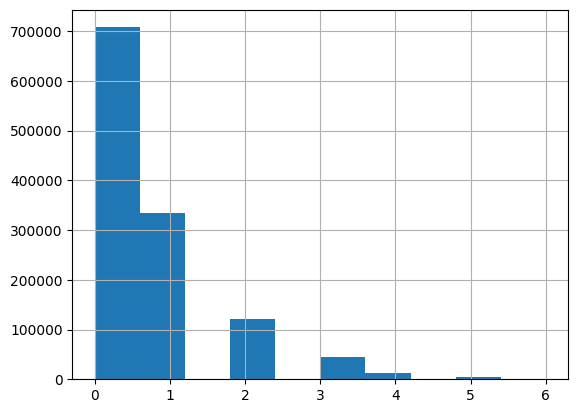

In [ ]:
df_cleaned_no_default['inq_last_6mths'].hist()
# data is not uniformely distributed so we will fill the null values with median

<Axes: >

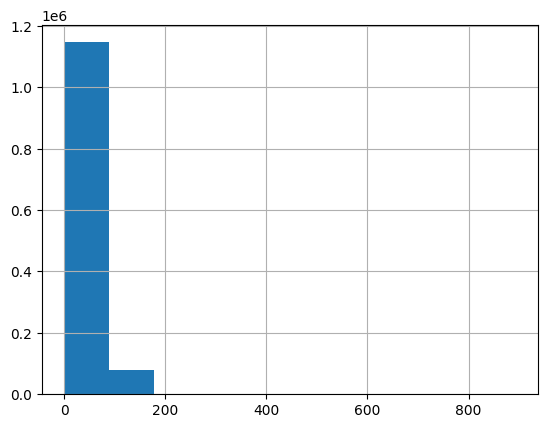

In [ ]:
df_cleaned_no_default['revol_util'].hist()

In [ ]:
print(f" maximum revol_util is:  {df_cleaned_no_default['revol_util'].max()}")
print(f" minimum revol_util is:  {df_cleaned_no_default['revol_util'].min()}")
print(f" average revol_util is:  {df_cleaned_no_default['revol_util'].mean()}")
print(f" median revol_util is:  {df_cleaned_no_default['revol_util'].median()}")
# we will fill na with median

 maximum revol_util is:  892.3
 minimum revol_util is:  0.0
 average revol_util is:  51.72742509505456
 median revol_util is:  52.0


In [ ]:
median_revol_util = df_cleaned_no_default['revol_util'].median()
df_cleaned_no_default['revol_util'] = df_cleaned_no_default['revol_util'].fillna(median_revol_util)

In [ ]:
#convert some emp length in integer and term into years

In [ ]:
#convert term year given 36 months and 60 months, we will convert it to 3 and 5 years respectively
#convert employement length given in string or with special character , that needs to convert it to number in length
def convert_term_to_years(df):
    df1 = df.copy() # create copy of dataframe
    df1['term_years'] = df1['term'].str.extract('(\d+)').astype(int) // 12 # extract the string part example 'months' and divide by 12

    return df1

def convert_emp_length(df):
  df1 = df.copy() # create copy of dataframe


  r = {
        r'10\+ years': '10',
        r'< 1 year': '0',
        r'(\d+) years?': r'\1',
        'n/a': np.nan
    }

    #
  df1['emp_length_years'] = df1['emp_length'].replace(r, regex=True) # apply the regular expression to the the data

  df1['emp_length_years'] = pd.to_numeric(df1['emp_length_years'], errors='coerce') # convert to numeric and remaining with Nan

  return df1

In [ ]:
df_cleaned_no_default= convert_term_to_years(df_cleaned_no_default)
df_cleaned_no_default = convert_emp_length(df_cleaned_no_default) #apply above function in data

In [ ]:
numeric_df = df_cleaned_no_default.select_dtypes(include=[np.number])
#numeric dataframe for correlation matrix

In [ ]:
corr= numeric_df.corr() #correlation in numeric features

In [ ]:
plt.figure(figsize=(70, 70))
sns.heatmap(corr, annot= True, vmin=-1, vmax=1, cmap = 'vlag', square= True)
#'funded_amnt_inv', 'funded_amnt_inv', 'installment'
##total_payment , total_pymnt_inv, total_rec_prncp,
##recoveries and collection_recovery_fee
#num_sats and open_acc :100%

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df_cleaned_no_default = df_cleaned_no_default.drop(['funded_amnt','funded_amnt_inv','installment','total_pymnt_inv'], axis =1)
#drop the features more than 90% correlated

In [ ]:
df_cleaned_no_default.head()

,id,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,purpose_category,emp_length_years,term_years
0,68407277,3600.00,36 months,13.99,C,C4,leadman,10+ years,MORTGAGE,55000.00,Not Verified,Dec-2015,Fully Paid,n,debt_consolidation,PA,5.91,0.00,Aug-2003,675.00,679.00,1.00,30.00,999.00,7.00,0.00,2765.00,29.70,13.00,w,821.72,0.00,0.00,0.00,Jan-2019,122.67,Mar-2019,564.00,560.00,0.00,1.00,0.00,722.00,144904.00,2.00,2.00,0.00,1.00,21.00,4981.00,36.00,3.00,3.00,722.00,34.00,9300.00,3.00,1.00,4.00,4.00,20701.00,1506.00,37.20,0.00,0.00,148.00,128.00,3.00,3.00,1.00,4.00,69.00,4.00,69.00,2.00,2.00,4.00,2.00,5.00,3.00,4.00,9.00,4.00,7.00,0.00,0.00,0.00,3.00,76.90,0.00,0.00,0.00,178050.00,7746.00,2400.00,13734.00,N,Cash,N,debt_consolidation,10,3
1,68355089,24700.00,36 months,11.99,C,C1,Engineer,10+ years,MORTGAGE,65000.00,Not Verified,Dec-2015,Fully Paid,n,small_business,SD,16.06,1.00,Dec-1999,715.00,719.00,4.00,6.00,999.00,22.00,0.00,21470.00,19.20,38.00,w,979.66,0.00,0.00,0.00,Jun-2016,926.35,Mar-2019,699.00,695.00,0.00,1.00,0.00,0.00,204396.00,1.00,1.00,0.00,1.00,19.00,18005.00,73.00,2.00,3.00,6472.00,29.00,111800.00,0.00,0.00,6.00,4.00,9733.00,57830.00,27.10,0.00,0.00,113.00,192.00,2.00,2.00,4.00,2.00,NaN,0.00,6.00,0.00,5.00,5.00,13.00,17.00,6.00,20.00,27.00,5.00,22.00,0.00,0.00,0.00,2.00,97.40,7.70,0.00,0.00,314017.00,39475.00,79300.00,24667.00,N,Cash,N,small_business,10,3
3,68476807,10400.00,60 months,22.45,F,F1,Contract Specialist,3 years,MORTGAGE,104433.00,Source Verified,Dec-2015,Fully Paid,n,major_purchase,PA,25.37,1.00,Jun-1998,695.00,699.00,3.00,12.00,999.00,12.00,0.00,21929.00,64.50,35.00,w,1340.50,0.00,0.00,0.00,Jul-2016,10128.96,Mar-2018,704.00,700.00,0.00,1.00,0.00,0.00,331730.00,1.00,3.00,0.00,3.00,14.00,73839.00,84.00,4.00,7.00,9702.00,78.00,34000.00,2.00,1.00,3.00,10.00,27644.00,4567.00,77.50,0.00,0.00,128.00,210.00,4.00,4.00,6.00,4.00,12.00,1.00,12.00,0.00,4.00,6.00,5.00,9.00,10.00,7.00,19.00,6.00,12.00,0.00,0.00,0.00,4.00,96.60,60.00,0.00,0.00,439570.00,95768.00,20300.00,88097.00,N,Cash,N,major_purchase,3,5
4,68426831,11950.00,36 months,13.44,C,C3,Veterinary Tecnician,4 years,RENT,34000.00,Source Verified,Dec-2015,Fully Paid,n,debt_consolidation,GA,10.20,0.00,Oct-1987,690.00,694.00,0.00,999.00,999.00,5.00,0.00,8822.00,68.40,6.00,w,1758.95,0.00,0.00,0.00,May-2017,7653.56,May-2017,759.00,755.00,0.00,1.00,0.00,0.00,12798.00,0.00,1.00,0.00,0.00,338.00,3976.00,99.00,0.00,0.00,4522.00,76.00,12900.00,0.00,0.00,0.00,0.00,2560.00,844.00,91.00,0.00,0.00,338.00,54.00,32.00,32.00,0.00,36.00,NaN,NaN,NaN,0.00,2.00,3.00,2.00,2.00,2.00,4.00,4.00,3.00,5.00,0.00,0.0

In [ ]:
# there are dynamic features which changes with change in time wrt loan, eg last installment date,
# we will delete those
# df_cleaned1 = df_cleaned1.drop(['last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','last_fico_range_high','last_fico_range_low','last_pymnt_amnt',
#                                 'collection_recovery_fee','recoveries','total_rec_late_fee','total_rec_int',
#                                 'total_pymnt','out_prncp_inv','out_prncp'], axis =1)
df_cleaned_no_default = df_cleaned_no_default.drop(['last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','last_pymnt_amnt',
                                'collection_recovery_fee','recoveries','total_rec_late_fee','total_rec_int',
                                ], axis =1)

In [ ]:
df_cleaned_no_default.isna().mean()*100

,0
id,0.00
loan_amnt,0.00
term,0.00
int_rate,0.00
grade,0.00
sub_grade,0.00
emp_title,0.00
emp_length,0.00
home_ownership,0.00
annual_inc,0.00


In [ ]:
df_cleaned_no_default.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1225770 entries, 0 to 1252196
Data columns (total 95 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   id                              1225770 non-null  int64  
 1   loan_amnt                       1225770 non-null  float64
 2   term                            1225770 non-null  object 
 3   int_rate                        1225770 non-null  float64
 4   grade                           1225770 non-null  object 
 5   sub_grade                       1225770 non-null  object 
 6   emp_title                       1225770 non-null  object 
 7   emp_length                      1225770 non-null  object 
 8   home_ownership                  1225770 non-null  object 
 9   annual_inc                      1225770 non-null  float64
 10  verification_status             1225770 non-null  object 
 11  issue_d                         1225770 non-null  object 
 12  loan_

In [ ]:
df_cleaned_no_default = df_cleaned_no_default.drop('num_sats', axis =1)

In [ ]:
df_cleaned_no_default['pct_tl_nvr_dlq'].min()

0.0

<Axes: >

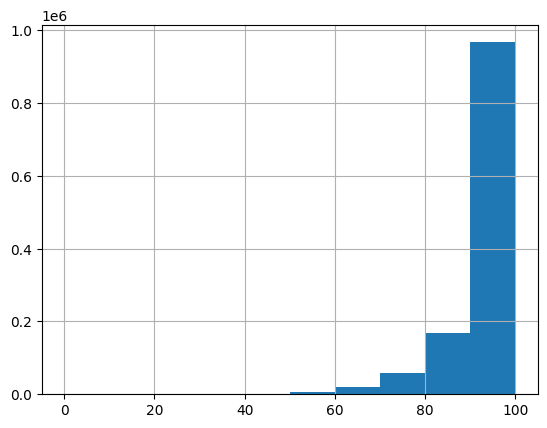

In [ ]:
df_cleaned_no_default['pct_tl_nvr_dlq'].hist()

In [ ]:
pct_tl_nvr_dlq_median = df_cleaned_no_default['pct_tl_nvr_dlq'].median()
df_cleaned_no_default['pct_tl_nvr_dlq'] = df_cleaned_no_default['pct_tl_nvr_dlq'].fillna(pct_tl_nvr_dlq_median)

<Axes: >

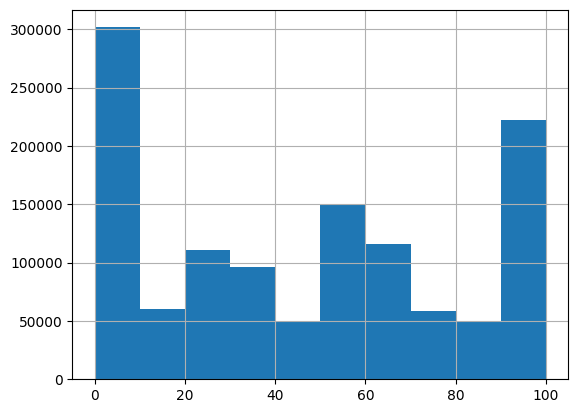

In [ ]:
df_cleaned_no_default['percent_bc_gt_75'].hist()

In [ ]:
percent_bc_gt_75_median = df_cleaned_no_default['percent_bc_gt_75'].median()
df_cleaned_no_default['percent_bc_gt_75']= df_cleaned_no_default['percent_bc_gt_75'].fillna(percent_bc_gt_75_median)

<Axes: >

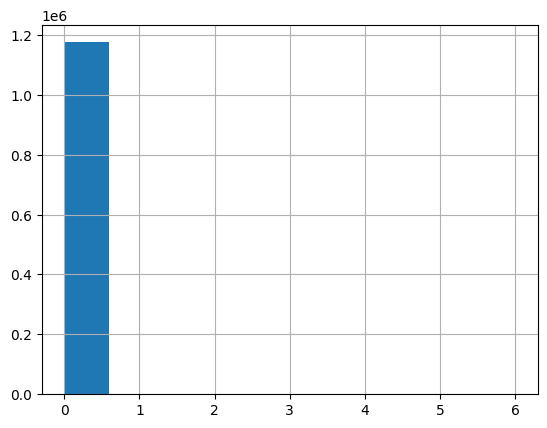

In [ ]:
df_cleaned_no_default['num_tl_120dpd_2m'].hist()

In [ ]:
df_cleaned_no_default['num_tl_120dpd_2m'].max()

6.0

In [ ]:
num_tl_120dpd_2m_median = df_cleaned_no_default['num_tl_120dpd_2m'].median()
df_cleaned_no_default['num_tl_120dpd_2m'] = df_cleaned_no_default['num_tl_120dpd_2m'].fillna(num_tl_120dpd_2m_median)

In [ ]:
df_cleaned_no_default['max_bal_bc'].head()

,max_bal_bc
0,722.00
1,6472.00
3,9702.00
4,4522.00
5,13048.00


In [ ]:
# open_rv_12m	58.539106 : Number of Revolving Trades Opened in Past 12 Months, there is a possibility that there is no credit cards open in 12 months

# open_rv_24m	58.539106: Number of Revolving Trades Opened in Past 24 Months, there is a possibility that there is no credit cards open in 12 months

# max_bal_bc	58.539106: This is the highest balance that a person has ever had on any of their credit cards, if there is no card means
# there is no maximum balance , will impute this with -1

In [ ]:
df_cleaned_no_default['open_rv_12m']= df_cleaned_no_default['open_rv_12m'].fillna(-1)
df_cleaned_no_default['open_rv_24m'] = df_cleaned_no_default['open_rv_24m'].fillna(-1)
df_cleaned_no_default['max_bal_bc'] = df_cleaned_no_default['max_bal_bc'].fillna(-1)


In [ ]:
df_cleaned_no_default[df_cleaned_no_default['open_rv_12m']==-1].tail()


,id,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,purpose_category,emp_length_years,term_years
1099869,2334898,16000.00,60 months,10.16,B,B1,local 729,10+ years,MORTGAGE,85000.00,Verified,Jan-2013,Fully Paid,n,credit_card,CA,21.70,0.00,Aug-1997,730.00,734.00,0.00,999.00,999.00,10.00,0.00,8921.00,54.70,28.00,w,714.00,710.00,0.00,1.00,0.00,0.00,280506.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.00,-1.00,-1.00,NaN,16300.00,NaN,NaN,NaN,7.00,31167.00,5025.00,58.10,0.00,0.00,119.00,186.00,2.00,2.00,3.00,10.00,NaN,12.00,NaN,0.00,1.00,2.00,2.00,7.00,10.00,5.00,15.00,2.00,0.00,0.00,0.00,4.00,100.00,50.00,0.00,0.00,308048.00,54502.00,12000.00,62991.00,N,Cash,N,credit_card,10,5
1099870,2375068,18000.00,36 months,18.75,D,D3,Pomptonian food service company,1 year,RENT,55500.00,Verified,Jan-2013,Fully Paid,n,debt_consolidation,NJ,23.48,0.00,Jun-1991,665.00,669.00,1.00,48.00,999.00,15.00,0.00,13102.00,82.10,38.00,f,549.00,545.00,0.00,1.00,0.00,0.00,16632.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.00,-1.00,-1.00,NaN,15963.00,NaN,NaN,NaN,6.00,1188.00,1347.00,82.70,0.00,0.00,162.00,261.00,2.00,2.00,0.00,5.00,NaN,5.00,48.00,0.00,6.00,12.00,6.00,14.00,13.00,14.00,25.00,12.00,0.00,0.00,0.00,3.00,94.00,83.30,0.00,0.00,46446.00,16632.00,7800.00,30483.00,N,Cash,N,debt_consolidation,1,3
1099871,2374791,17000.00,36 months,12.12,B,B3,Teacher,10+ years,RENT,158000.00,Verified,Jan-2013,Fully Paid,n,debt_consolidation,TX,25.54,3.00,May-1990,675.00,679.00,0.00,6.00,999.00,7.00,0.00,5896.00,57.80,19.00,f,729.00,725.00,0.00,1.00,0.00,114.00,17421.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.00,-1.00,-1.00,NaN,10200.00,NaN,NaN,NaN,2.00,2489.00,165.00,95.50,0.00,0.00,128.00,275.00,35.00,4.00,4.00,35.00,NaN,NaN,6.00,1.00,1.00,2.00,1.00,6.00,5.00,3.00,9.00,2.00,0.00,0.00,1.00,1.00,84.00,100.00,0.00,0.00,64760.00,17421.00,3700.00,54327.00,N,Cash,N,debt_consolidation,10,3
1099872,2301035,31500.00,36 months,12.12,B,B3,direct telecom inc,9 years,MORTGAGE,200000.00,Verified,Jan-2013,Fully Paid,n,credit_card,CA,13.81,0.00,Aug-2000,705.00,709.00,3.00,45.00,999.00,13.00,0.00,31860.00,79.90,24.00,f,634.00,630.00,0.00,1.00,0.00,0.00,830611.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.00,-1.00,-1.00,NaN,41130.00,NaN,NaN,NaN,4.00,63893.00,7631.00,82.70,0.00,0.00,150.00,142.00,69.00,4.00,3.00,69.00,NaN,4.00,NaN,1.00,8.00,9.00,8.00,12.00,8.00,9.00,13.00,9.00,0.00,0.00,0.00,3.00,95.00,37.50,0.00,0.00,853781.00,70243.00,38030.00,47651.00,N,Cash,N,credit_card,9,3
1099873,2300581,28000.00,36 months,7.90,A,A4,Trugreen,10+ years,RENT,84000.00,Verified,Jan-2013,Fully Paid,n,debt_consolidation,NY,25.86,0.00,Jul-1999,730.00,734.00,0.00,999.00,999.00,7.00,0.00,33601.00,68.20,10.00,f,794.00,790.00,0.00,1.00,0.00,0.00,46502.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.00,-1.00,-1.00,NaN

In [ ]:
df_cleaned_no_default['policy_code'].unique()

array([1.])

In [ ]:
df_cleaned_no_default = df_cleaned_no_default.drop('policy_code', axis =1)

In [ ]:
df_cleaned_no_default['open_act_il'].head()

,open_act_il
0,2.00
1,1.00
3,3.00
4,1.00
5,2.00


In [ ]:
# open_act_il	58.539106
# open_il_12m	58.539106
# open_il_24m	58.539106
df_cleaned_no_default['open_act_il']= df_cleaned_no_default['open_act_il'].fillna(-1)
df_cleaned_no_default['open_il_12m'] = df_cleaned_no_default['open_il_12m'].fillna(-1)
df_cleaned_no_default['open_il_24m'] = df_cleaned_no_default['open_il_24m'].fillna(-1)

In [ ]:
df_cleaned_no_default= df_cleaned_no_default.drop('pymnt_plan', axis =1)

In [ ]:
df_cleaned_no_default.isna().mean()*100

,0
id,0.00
loan_amnt,0.00
term,0.00
int_rate,0.00
grade,0.00
sub_grade,0.00
emp_title,0.00
emp_length,0.00
home_ownership,0.00
annual_inc,0.00


In [ ]:
# mths_since_recent_bc_dlq	74.975911
# mths_since_recent_revol_delinq	65.047376
#we are considering there is no delinque in above features
df_cleaned_no_default= df_cleaned_no_default.drop(['mths_since_recent_bc_dlq','mths_since_recent_revol_delinq'], axis =1)

In [ ]:
df_cleaned_no_default['num_rev_accts'].median()

13.0

<Axes: >

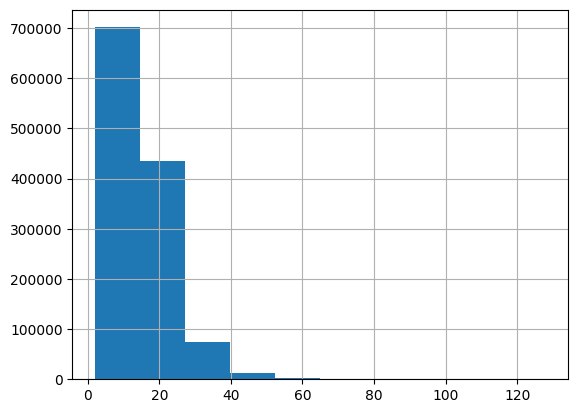

In [ ]:
df_cleaned_no_default['num_rev_accts'].hist()

In [ ]:
num_rev_accts_median = df_cleaned_no_default['num_rev_accts'].median()
df_cleaned_no_default['num_rev_accts'] = df_cleaned_no_default['num_rev_accts'].fillna(num_rev_accts_median)

In [ ]:
df_cleaned_no_default.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1225770 entries, 0 to 1252196
Data columns (total 90 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   id                          1225770 non-null  int64  
 1   loan_amnt                   1225770 non-null  float64
 2   term                        1225770 non-null  object 
 3   int_rate                    1225770 non-null  float64
 4   grade                       1225770 non-null  object 
 5   sub_grade                   1225770 non-null  object 
 6   emp_title                   1225770 non-null  object 
 7   emp_length                  1225770 non-null  object 
 8   home_ownership              1225770 non-null  object 
 9   annual_inc                  1225770 non-null  float64
 10  verification_status         1225770 non-null  object 
 11  issue_d                     1225770 non-null  object 
 12  loan_status                 1225770 non-null  object 
 13  pu

In [ ]:
#Handling FICO score with average pf low and high FICO value as Lending club provide FICO in range
df_cleaned_no_default['fico_score'] = ((df_cleaned_no_default['fico_range_high'] + df_cleaned_no_default['fico_range_low'])/2)

In [ ]:
df_cleaned_no_default['fico_score_last'] = ((df_cleaned_no_default['last_fico_range_high'] + df_cleaned_no_default['last_fico_range_low'])/2)

In [ ]:
#delete the original FICO range after average
df_cleaned_no_default = df_cleaned_no_default.drop(['fico_range_high','fico_range_low','last_fico_range_high','last_fico_range_low'], axis =1)

In [ ]:
#In our data we are not doing time series analysis
#we will find the time duration from first loan taken to the issue date of loan from lending club
df_cleaned_no_default['issue_d'].head()

,issue_d
0,Dec-2015
1,Dec-2015
3,Dec-2015
4,Dec-2015
5,Dec-2015


In [ ]:
df_cleaned_no_default['earliest_cr_line'].head()
#earliest_cr_line is the first loan taken by the borower

,earliest_cr_line
0,Aug-2003
1,Dec-1999
3,Jun-1998
4,Oct-1987
5,Jun-1990


In [ ]:
#function to time duration from first loan taken to the issue date of loan from lending club in months
def calculate_length_of_credit_history(df):

    df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%Y') # convert to datetime
    df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%Y') #convert to datetime


    df['credit_history_months'] = (df['issue_d'] - df['earliest_cr_line']).dt.days / 30.44  #difference in months


    df['credit_history_years'] = df['credit_history_months'] / 12 #difference in year


    df['credit_history_months'] = df['credit_history_months'].round(2) #round to 2 decimal places
    df['credit_history_years'] = df['credit_history_years'].round(2)

    return df

In [ ]:
df_cleaned_no_default = calculate_length_of_credit_history(df_cleaned_no_default)

In [ ]:
df_cleaned_no_default.head()

,id,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,purpose_category,emp_length_years,term_years,fico_score_last,fico_score,credit_history_months,credit_history_years
0,68407277,3600.00,36 months,13.99,C,C4,leadman,10+ years,MORTGAGE,55000.00,Not Verified,2015-12-01,Fully Paid,debt_consolidation,PA,5.91,0.00,2003-08-01,1.00,30.00,999.00,7.00,0.00,2765.00,29.70,13.00,w,0.00,0.00,722.00,144904.00,2.00,2.00,0.00,1.00,21.00,4981.00,36.00,3.00,3.00,722.00,34.00,9300.00,3.00,1.00,4.00,4.00,20701.00,1506.00,37.20,0.00,0.00,148.00,128.00,3.00,3.00,1.00,4.00,4.00,2.00,2.00,4.00,2.00,5.00,3.00,4.00,9.00,4.00,0.00,0.00,0.00,3.00,76.90,0.00,0.00,0.00,178050.00,7746.00,2400.00,13734.00,N,Cash,N,debt_consolidation,10,3,562.00,677.00,148.00,12.33
1,68355089,24700.00,36 months,11.99,C,C1,Engineer,10+ years,MORTGAGE,65000.00,Not Verified,2015-12-01,Fully Paid,small_business,SD,16.06,1.00,1999-12-01,4.00,6.00,999.00,22.00,0.00,21470.00,19.20,38.00,w,0.00,0.00,0.00,204396.00,1.00,1.00,0.00,1.00,19.00,18005.00,73.00,2.00,3.00,6472.00,29.00,111800.00,0.00,0.00,6.00,4.00,9733.00,57830.00,27.10,0.00,0.00,113.00,192.00,2.00,2.00,4.00,2.00,0.00,0.00,5.00,5.00,13.00,17.00,6.00,20.00,27.00,5.00,0.00,0.00,0.00,2.00,97.40,7.70,0.00,0.00,314017.00,39475.00,79300.00,24667.00,N,Cash,N,small_business,10,3,697.00,717.00,191.98,16.00
3,68476807,10400.00,60 months,22.45,F,F1,Contract Specialist,3 years,MORTGAGE,104433.00,Source Verified,2015-12-01,Fully Paid,major_purchase,PA,25.37,1.00,1998-06-01,3.00,12.00,999.00,12.00,0.00,21929.00,64.50,35.00,w,0.00,0.00,0.00,331730.00,1.00,3.00,0.00,3.00,14.00,73839.00,84.00,4.00,7.00,9702.00,78.00,34000.00,2.00,1.00,3.00,10.00,27644.00,4567.00,77.50,0.00,0.00,128.00,210.00,4.00,4.00,6.00,4.00,1.00,0.00,4.00,6.00,5.00,9.00,10.00,7.00,19.00,6.00,0.00,0.00,0.00,4.00,96.60,60.00,0.00,0.00,439570.00,95768.00,20300.00,88097.00,N,Cash,N,major_purchase,3,5,702.00,697.00,209.99,17.50
4,68426831,11950.00,36 months,13.44,C,C3,Veterinary Tecnician,4 years,RENT,34000.00,Source Verified,2015-12-01,Fully Paid,debt_consolidation,GA,10.20,0.00,1987-10-01,0.00,999.00,999.00,5.00,0.00,8822.00,68.40,6.00,w,0.00,0.00,0.00,12798.00,0.00,1.00,0.00,0.00,338.00,3976.00,99.00,0.00,0.00,4522.00,76.00,12900.00,0.00,0.00,0.00,0.00,2560.00,844.00,91.00,0.00,0.00,338.00,54.00,32.00,32.00,0.00,36.00,NaN,0.00,2.00,3.00,2.00,2.00,2.00,4.00,4.00,3.00,0.00,0.00,0.00,0.00,100.00,100.00,0.00,0.00,16900.00,12798.00,9400.00,4000.00,N,Cash,N,debt_consolidation,4,3,757.00,692.00,337.98,28.16
5,68476668,20000.00,36 months,9.17,B,B2,Vice President of Recruiting Operations,10+ years,MORTGAGE,180000.00,Not Verified,2015-12-01,Fully Paid,debt_consolidation,MN,14.67,0.00,1990-06-01,0.00,49.00,999.00,12.00,0.00,87329.00,84.50,27.00,f,0.00,0.00,0.00,360358.00,0.00,2.00,0.00,2.00,18.00,29433.00,63.00,2.00,3.00,13048.00,74.00,94200.00,1.00,0.00,1.00,6.00,30030.00,0.00,10

In [ ]:
# df_cleaned_no_default[['issue_d','earliest_cr_line','credit_history_months']].head()

In [ ]:
df_cleaned_no_default = df_cleaned_no_default.drop(['earliest_cr_line','issue_d'], axis =1)
#drop the date features as no longer required

In [ ]:
df_cleaned_no_default = df_cleaned_no_default.drop('credit_history_months', axis =1)
#drop credit_history_months, as we are using credit_history_years

In [ ]:
df_cleaned_no_default.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1225770 entries, 0 to 1252196
Data columns (total 87 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   id                          1225770 non-null  int64  
 1   loan_amnt                   1225770 non-null  float64
 2   term                        1225770 non-null  object 
 3   int_rate                    1225770 non-null  float64
 4   grade                       1225770 non-null  object 
 5   sub_grade                   1225770 non-null  object 
 6   emp_title                   1225770 non-null  object 
 7   emp_length                  1225770 non-null  object 
 8   home_ownership              1225770 non-null  object 
 9   annual_inc                  1225770 non-null  float64
 10  verification_status         1225770 non-null  object 
 11  loan_status                 1225770 non-null  object 
 12  purpose                     1225770 non-null  object 
 13  ad

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
df_cleaned_no_default.isna().mean()*100 #check the null values

,0
id,0.00
loan_amnt,0.00
term,0.00
int_rate,0.00
grade,0.00
sub_grade,0.00
emp_title,0.00
emp_length,0.00
home_ownership,0.00
annual_inc,0.00


In [ ]:
#check the features which has same percentage of null values
df_cleaned_no_default[['open_acc_6m','mths_since_rcnt_il','total_bal_il','il_util','all_util','inq_fi','total_cu_tl','inq_last_12m','bc_open_to_buy','bc_util','mo_sin_old_il_acct','mths_since_recent_bc','mths_since_recent_inq',]].head()

,open_acc_6m,mths_since_rcnt_il,total_bal_il,il_util,all_util,inq_fi,total_cu_tl,inq_last_12m,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mths_since_recent_bc,mths_since_recent_inq
0,2.00,21.00,4981.00,36.00,34.00,3.00,1.00,4.00,1506.00,37.20,148.00,4.00,4.00
1,1.00,19.00,18005.00,73.00,29.00,0.00,0.00,6.00,57830.00,27.10,113.00,2.00,0.00
3,1.00,14.00,73839.00,84.00,78.00,2.00,1.00,3.00,4567.00,77.50,128.00,4.00,1.00
4,0.00,338.00,3976.00,99.00,76.00,0.00,0.00,0.00,844.00,91.00,338.00,36.00,NaN
5,0.00,18.00,29433.00,63.00,74.00,1.00,0.00,1.00,0.00,102.90,142.00,12.00,10.00


In [ ]:
#impute them with -1 as they either define not applicable or kept blank as not compulsory
df_cleaned_no_default['open_acc_6m'] = df_cleaned_no_default['open_acc_6m'].fillna(-1)
df_cleaned_no_default['mths_since_rcnt_il'] = df_cleaned_no_default['mths_since_rcnt_il'].fillna(999)
df_cleaned_no_default['total_bal_il'] = df_cleaned_no_default['total_bal_il'].fillna(-1)
df_cleaned_no_default['il_util'] = df_cleaned_no_default['il_util'].fillna(-1)
df_cleaned_no_default['all_util'] = df_cleaned_no_default['all_util'].fillna(-1)
df_cleaned_no_default['inq_fi'] = df_cleaned_no_default['inq_fi'].fillna(-1)
df_cleaned_no_default['total_cu_tl'] = df_cleaned_no_default['total_cu_tl'].fillna(-1)
df_cleaned_no_default['inq_last_12m'] = df_cleaned_no_default['inq_last_12m'].fillna(-1)


In [ ]:
#fill other null with median
bc_open_to_buy_median = df_cleaned_no_default['bc_open_to_buy'].median()
df_cleaned_no_default['bc_open_to_buy'] = df_cleaned_no_default['bc_open_to_buy'].fillna(bc_open_to_buy_median)

In [ ]:
bc_util_median = df_cleaned_no_default['bc_util'].median()
df_cleaned_no_default['bc_util'] = df_cleaned_no_default['bc_util'].fillna(bc_util_median)

In [ ]:
mo_sin_old_il_acct_median = df_cleaned_no_default['mo_sin_old_il_acct'].median()
df_cleaned_no_default['mo_sin_old_il_acct'] = df_cleaned_no_default['mo_sin_old_il_acct'].fillna(mo_sin_old_il_acct_median)

mths_since_recent_bc_median = df_cleaned_no_default['mths_since_recent_bc'].median()
df_cleaned_no_default['mths_since_recent_bc'] = df_cleaned_no_default['mths_since_recent_bc'].fillna(mths_since_recent_bc_median)

mths_since_recent_inq_median = df_cleaned_no_default['mths_since_recent_inq'].median()
df_cleaned_no_default['mths_since_recent_inq'] = df_cleaned_no_default['mths_since_recent_inq'].fillna(mths_since_recent_inq_median)

In [ ]:
df_cleaned_no_default.isna().mean()*100

,0
id,0.00
loan_amnt,0.00
term,0.00
int_rate,0.00
grade,0.00
sub_grade,0.00
emp_title,0.00
emp_length,0.00
home_ownership,0.00
annual_inc,0.00


In [ ]:
df_cleaned_no_default.head()

,id,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,purpose_category,emp_length_years,term_years,fico_score_last,fico_score,credit_history_years
0,68407277,3600.00,36 months,13.99,C,C4,leadman,10+ years,MORTGAGE,55000.00,Not Verified,Fully Paid,debt_consolidation,PA,5.91,0.00,1.00,30.00,999.00,7.00,0.00,2765.00,29.70,13.00,w,0.00,0.00,722.00,144904.00,2.00,2.00,0.00,1.00,21.00,4981.00,36.00,3.00,3.00,722.00,34.00,9300.00,3.00,1.00,4.00,4.00,20701.00,1506.00,37.20,0.00,0.00,148.00,128.00,3.00,3.00,1.00,4.00,4.00,2.00,2.00,4.00,2.00,5.00,3.00,4.00,9.00,4.00,0.00,0.00,0.00,3.00,76.90,0.00,0.00,0.00,178050.00,7746.00,2400.00,13734.00,N,Cash,N,debt_consolidation,10,3,562.00,677.00,12.33
1,68355089,24700.00,36 months,11.99,C,C1,Engineer,10+ years,MORTGAGE,65000.00,Not Verified,Fully Paid,small_business,SD,16.06,1.00,4.00,6.00,999.00,22.00,0.00,21470.00,19.20,38.00,w,0.00,0.00,0.00,204396.00,1.00,1.00,0.00,1.00,19.00,18005.00,73.00,2.00,3.00,6472.00,29.00,111800.00,0.00,0.00,6.00,4.00,9733.00,57830.00,27.10,0.00,0.00,113.00,192.00,2.00,2.00,4.00,2.00,0.00,0.00,5.00,5.00,13.00,17.00,6.00,20.00,27.00,5.00,0.00,0.00,0.00,2.00,97.40,7.70,0.00,0.00,314017.00,39475.00,79300.00,24667.00,N,Cash,N,small_business,10,3,697.00,717.00,16.00
3,68476807,10400.00,60 months,22.45,F,F1,Contract Specialist,3 years,MORTGAGE,104433.00,Source Verified,Fully Paid,major_purchase,PA,25.37,1.00,3.00,12.00,999.00,12.00,0.00,21929.00,64.50,35.00,w,0.00,0.00,0.00,331730.00,1.00,3.00,0.00,3.00,14.00,73839.00,84.00,4.00,7.00,9702.00,78.00,34000.00,2.00,1.00,3.00,10.00,27644.00,4567.00,77.50,0.00,0.00,128.00,210.00,4.00,4.00,6.00,4.00,1.00,0.00,4.00,6.00,5.00,9.00,10.00,7.00,19.00,6.00,0.00,0.00,0.00,4.00,96.60,60.00,0.00,0.00,439570.00,95768.00,20300.00,88097.00,N,Cash,N,major_purchase,3,5,702.00,697.00,17.50
4,68426831,11950.00,36 months,13.44,C,C3,Veterinary Tecnician,4 years,RENT,34000.00,Source Verified,Fully Paid,debt_consolidation,GA,10.20,0.00,0.00,999.00,999.00,5.00,0.00,8822.00,68.40,6.00,w,0.00,0.00,0.00,12798.00,0.00,1.00,0.00,0.00,338.00,3976.00,99.00,0.00,0.00,4522.00,76.00,12900.00,0.00,0.00,0.00,0.00,2560.00,844.00,91.00,0.00,0.00,338.00,54.00,32.00,32.00,0.00,36.00,5.00,0.00,2.00,3.00,2.00,2.00,2.00,4.00,4.00,3.00,0.00,0.00,0.00,0.00,100.00,100.00,0.00,0.00,16900.00,12798.00,9400.00,4000.00,N,Cash,N,debt_consolidation,4,3,757.00,692.00,28.16
5,68476668,20000.00,36 months,9.17,B,B2,Vice President of Recruiting Operations,10+ years,MORTGAGE,180000.00,Not Verified,Fully Paid,debt_consolidation,MN,14.67,0.00,0.00,49.00,999.00,12.00,0.00,87329.00,84.50,27.00,f,0.00,0.00,0.00,360358.00,0.00,2.00,0.00,2.00,18.00,29433.00,63.00,2.00,3.00,13048.00,74.00,94200.00,1.00,0.00,1.00,6.00,30030.00,0.00,102.90,0.00,0.00,142.00,306.00,10.00,10.00,4.00,12.00,10.00,0.00,4.00,6.00,4.00,5.00,7.00,9.00,16.00,6.00,0.00,0.00,0.00,2.00,96.30,100.00,0.00,0.00,388852.00,116762.00,31500.00,46452.00

In [ ]:
df_cleaned_no_default['loan_status'].value_counts()

,count
loan_status,
Fully Paid,977984
Charged Off,247786


In [ ]:
df_cleaned_no_default = df_cleaned_no_default.drop('emp_length',axis=1)

In [ ]:

df_cleaned_no_default.to_csv('drive/My Drive/Dissertation/FINAL_unbalancedData.csv', index=False, encoding='utf-8')

In [ ]:
#****************************************************************************************************************************